In [1]:
# month = monthly_bikeuse['Rent_Date']
# usage = monthly_bikeuse['monthly_cnt']
# #선 그래프를 그린다. x축에는 month, y축에는 usage 표시한다.
# plt.plot(month, usage, color = 'green', marker = 'o', linestyle = 'solid')
# plt.savefig('gdp_per_capita.png', dpi = 600)

In [18]:
import glob 
import pandas as pd
import os
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as BS 
from tqdm import tqdm
import folium
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns
import pymysql
import warnings
warnings.filterwarnings('ignore')
con =pymysql.connect(host='ip', user='id', password='pw', db='encore6', charset='utf8')
cur = con.cursor()


In [4]:
# CycleRentUse 자전거 데이터 2018~2022 총
# violation_accident 위반유형 - BASE_NAME
# violation_accident_cycle_month 위반유형 월별자저
# accitype_accident 사고유형
# accitype_accident_cycle_month 사고유형 월별자전거
# age_accident 연령대
# age_accident_cycle_month 연령대별 월별자전거
# carexp_accident  운전경력
# carexp_accident_cycle_month 운정경력 월별자전
# hire_point 위도경도
# road_accident 도로형태별 
# road_accident_cycle_month 도로형별 월별자전
# weather_accident 기상상태별
# weather_accident_cycle_month 기상상태별 월별자전


In [19]:
# sql에서 df가져오기
violation_accident = pd.read_sql_query("select * from violation_accident", con=con)
cycleRentUse = pd.read_sql_query("select * from CycleRentUse ", con=con)
violation_accident_cycle_month = pd.read_sql_query("select * from violation_accident_cycle_month", con=con)
accitype_accident = pd.read_sql_query("select * from accitype_accident", con=con)
accitype_accident_cycle_month = pd.read_sql_query("select * from accitype_accident_cycle_month", con=con)
age_accident = pd.read_sql_query("select * from age_accident", con=con)
age_accident_cycle_month = pd.read_sql_query("select * from age_accident_cycle_month", con=con)
carexp_accident = pd.read_sql_query("select * from carexp_accident", con=con)
carexp_accident_cycle_month = pd.read_sql_query("select * from carexp_accident_cycle_month", con=con)
hire_point = pd.read_sql_query("select * from hire_point", con=con)
road_accident = pd.read_sql_query("select * from road_accident", con=con)
road_accident_cycle_month = pd.read_sql_query("select * from road_accident_cycle_month", con=con)
weather_accident = pd.read_sql_query("select * from weather_accident", con=con)
weather_accident_cycle_month = pd.read_sql_query("select * from weather_accident_cycle_month", con=con)

In [6]:
# 어차피 구마다 합계는 같으므로 지자체별로 나누어서 acc_cnt합계 히트맵그리기
violation_accident_group_jijace = violation_accident.groupby(["JIJACE_NM"],as_index=False)[["ACC_CNT"]].sum()
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
geo_str = requests.get("https://t1.daumcdn.net/cfile/tistory/272C224C58B4BD540B").json()
m = folium.Choropleth(geo_str, 
                  data = violation_accident_group_jijace,
                  columns=['JIJACE_NM', 'ACC_CNT'],
                  fill_color="PuRd",
                  key_on="feature.id").add_to(map)
# map

In [7]:
# violation_accident.loc[0]

In [4]:
#BASE_NAME이 위반유형 groupby violation_accident
violation_accident_groupby_base_name = violation_accident.groupby(["BASE_NAME"],as_index=False)[["ACC_CNT"]].sum()
# violation_accident_groupby_base_name
# violation_accident_groupby_base_name["BASE_NAME"]

In [9]:
# FONT가 안되어서 번역
# 과속 - Speeding
# 교차로운행방법위반 - Violation of Intersection Operation Method
# 기타 - Other
# 보행자보호의무위반 - Violation of Duty to Protect Pedestrians
# 불법유턴 - Illegal U-turn
# 신호위반 - Signal Violation
# 안전거리미확보 - Failure to Maintain Safe Distance
# 안전운전불이행 - Failure to Observe Safe Driving Practices
# 알수없음 - Unknown
# 중앙선침범 - Crossing the Centerline
# 직진우회전진행방해 - Obstruction of Straight or Right Turn Traffic
# 차로위반 - Lane Violation

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

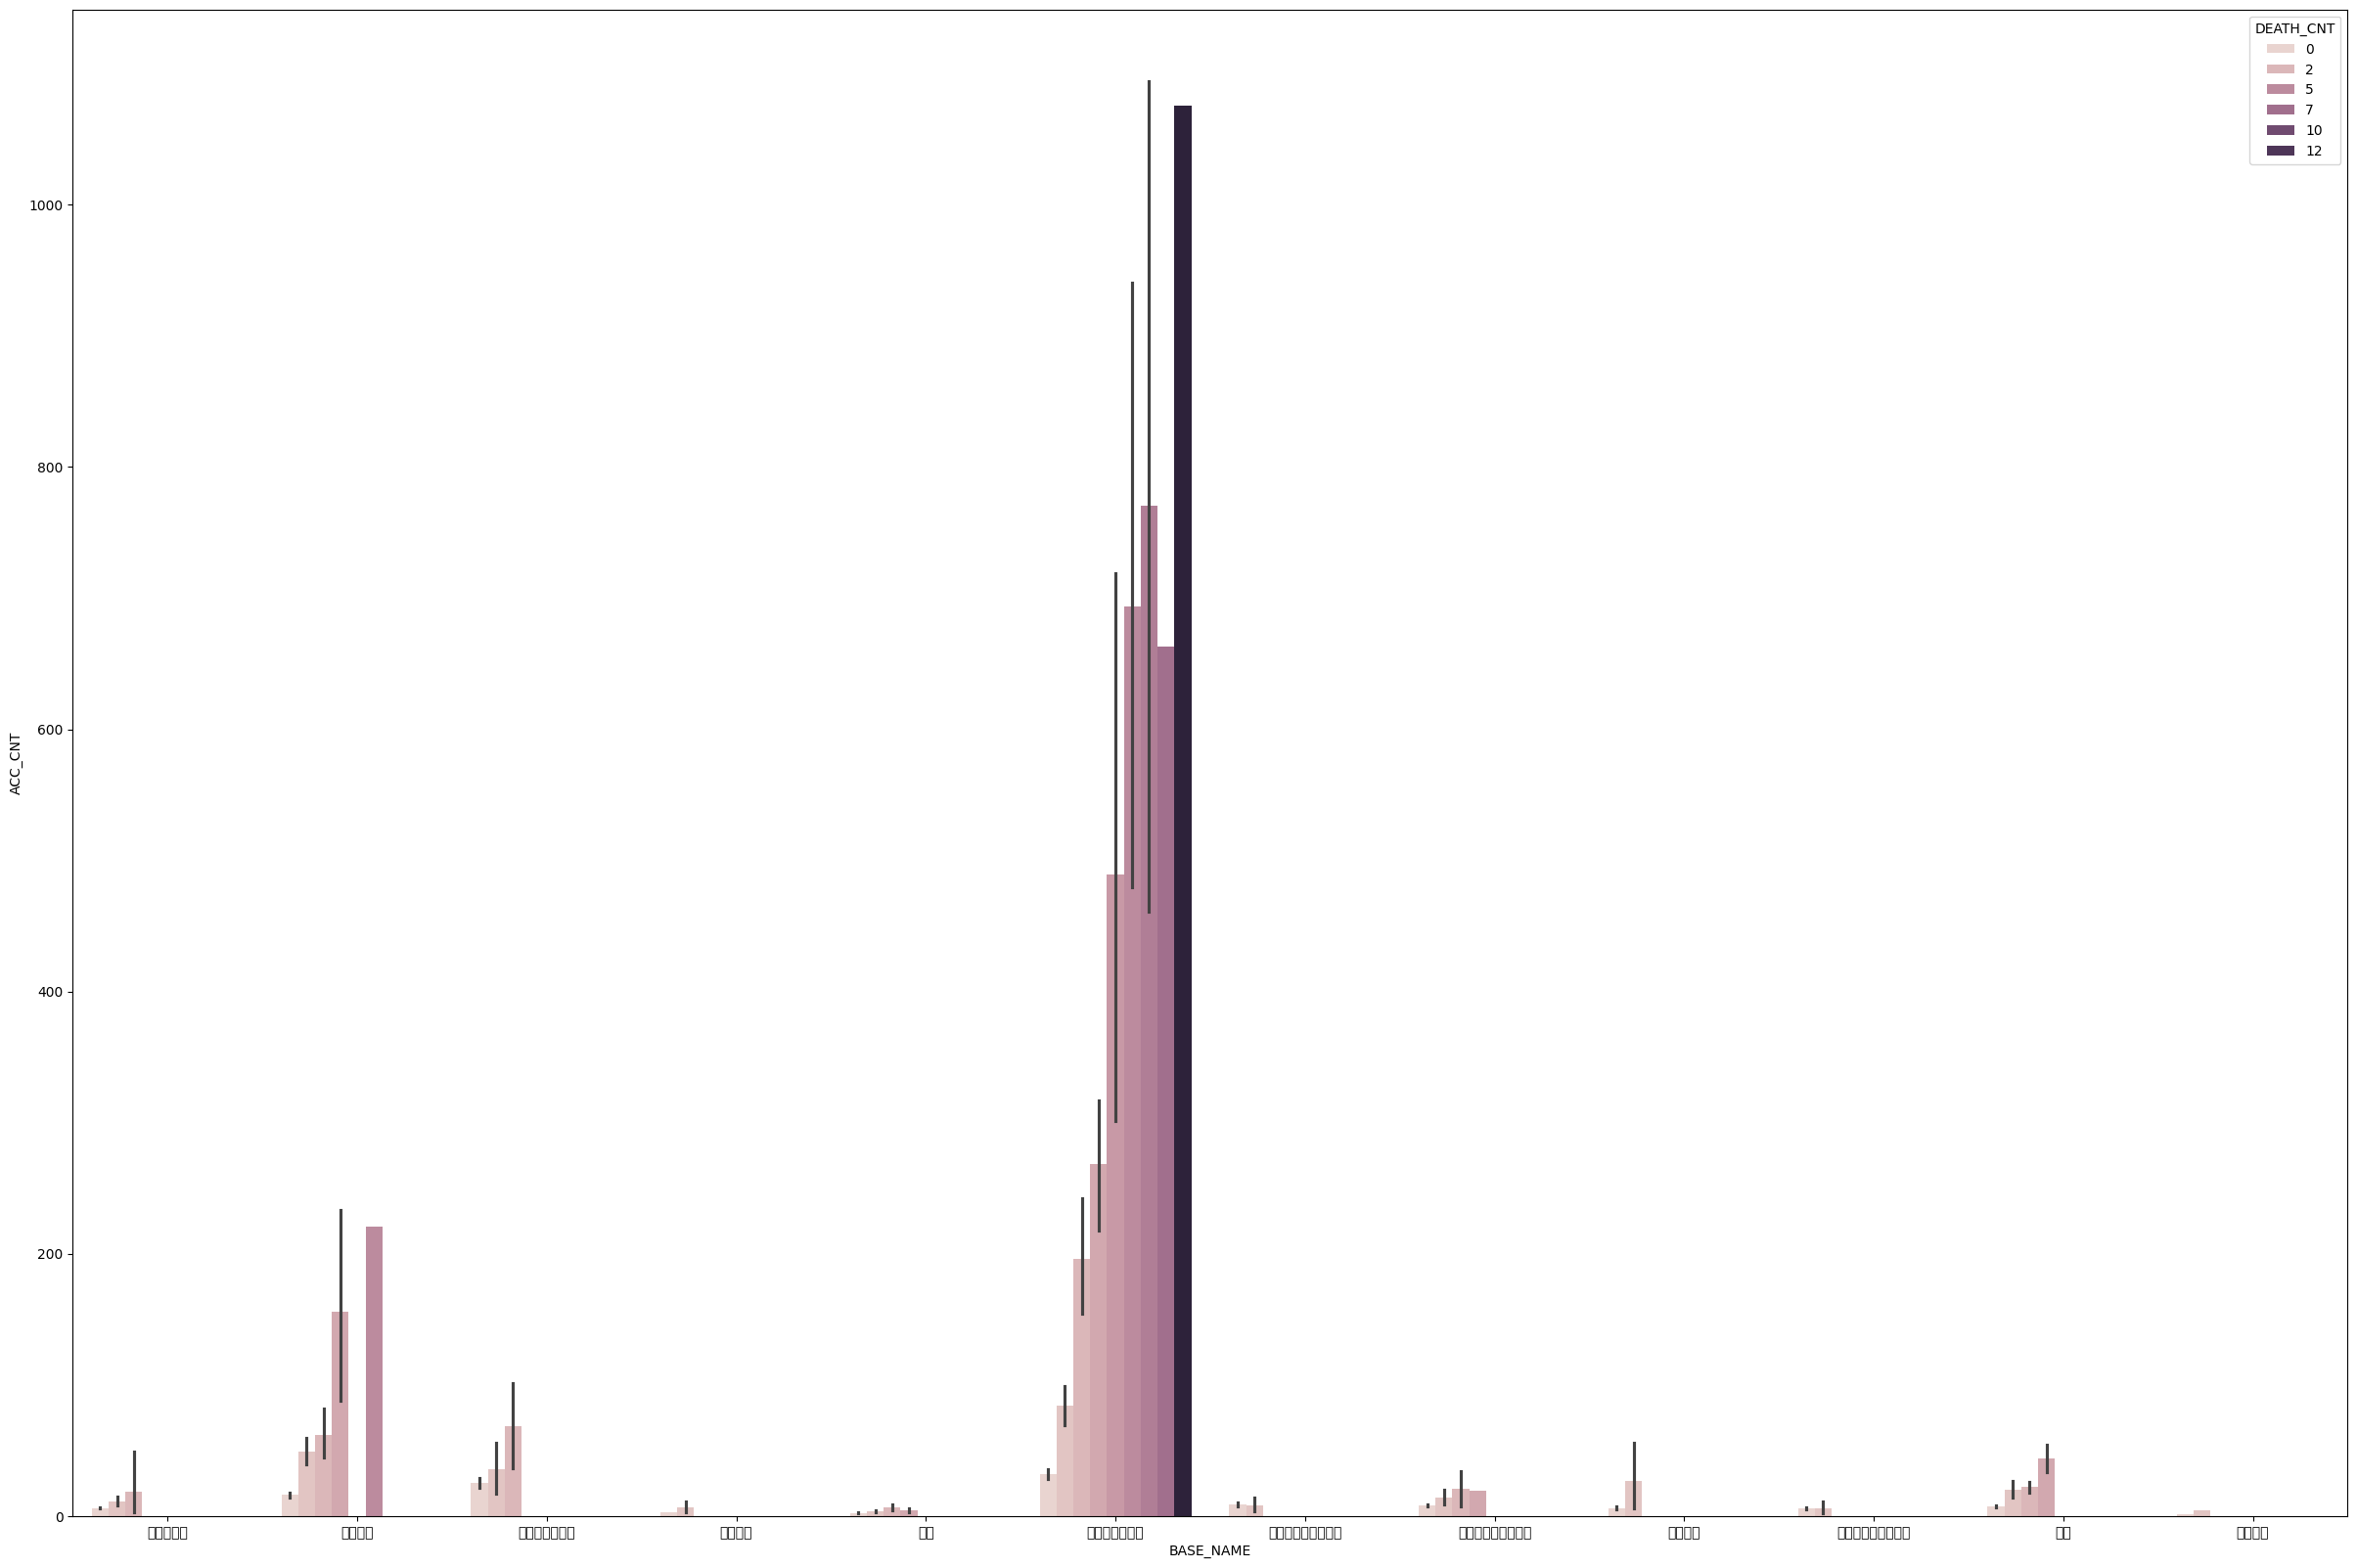

In [6]:
# "BASE_NAME"별로 ACC_CNT 시각화 DEATH_CNT 추가
plt.figure(figsize=(30, 20)) 
# sns.barplot(x=violation_accident_groupby_base_name["BASE_NAME"], y=violation_accident_groupby_base_name["ACC_CNT"])
sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="DEATH_CNT", data=violation_accident)
# plt.title('violation_accident')
# plt.show()

In [11]:
cycleRentUse.head(1)

,Rent_Date,Rent_Number,Rent_Count
0,2019-01,3,64


In [8]:
cycleRentUse_group = cycleRentUse.groupby(["Rent_Date"],as_index=False)[["Rent_Count"]].sum()

In [13]:
cycleRentUse_group.head(1)

,Rent_Date,Rent_Count
0,2018-01,164320


<Axes: xlabel='Rent_Date', ylabel='Rent_Count'>

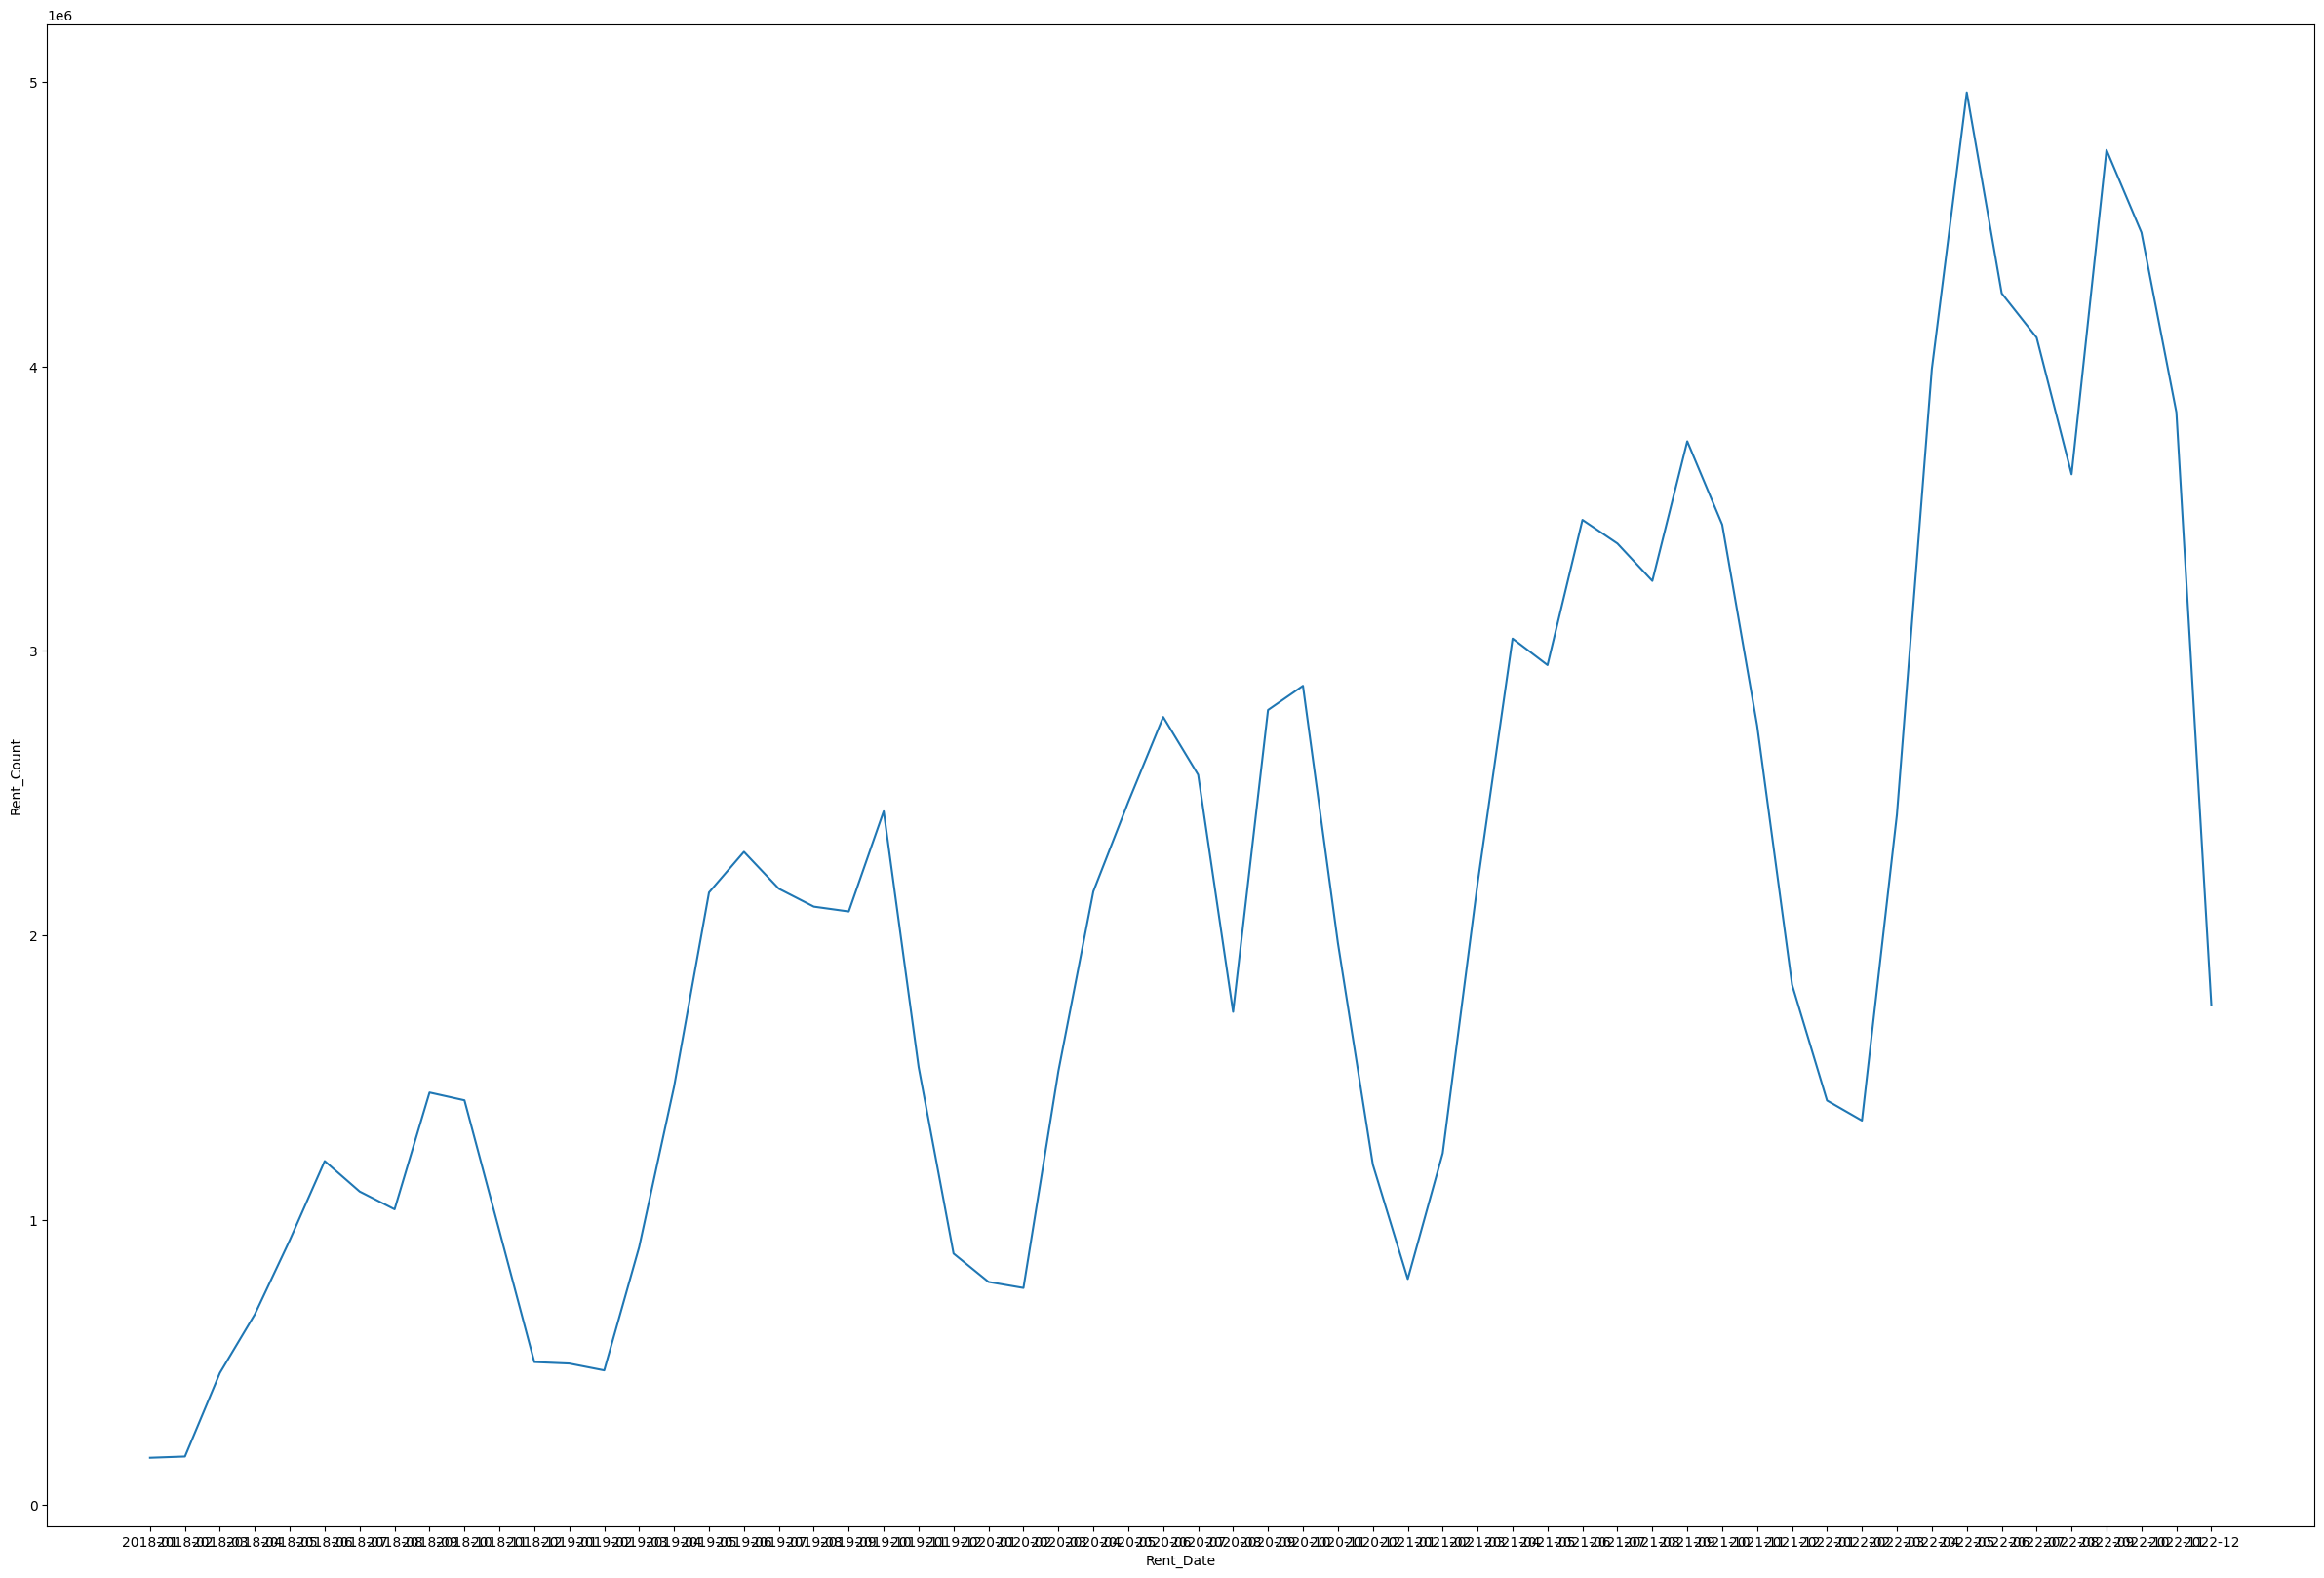

In [9]:
#자전거 년-월 증가에 따른 자전거 사고율의 연관성
# cycleRentUse_group = cycleRentUse.groupby(["BASE_NAME"],as_index=False)[["ACC_CNT"]].sum()
plt.figure(figsize=(30, 20)) 
# sns.barplot(x=violation_accident_groupby_base_name["BASE_NAME"], y=violation_accident_groupby_base_name["ACC_CNT"])
# sns.lineplot(x="Rent_Date", y="Rent_Count", data=cycleRentUse_group)
# plt.title('violation_accident')
# plt.show()

In [15]:
# violation_accident_cycle_month.head(1)

In [21]:
violation_accident_cycle_month_group=violation_accident_cycle_month.groupby(["YEAR","MONTH"],as_index=False)[["ACC_CNT"]].sum()

In [17]:
# violation_accident_cycle_month_group

<Axes: xlabel='MONTH', ylabel='ACC_CNT'>

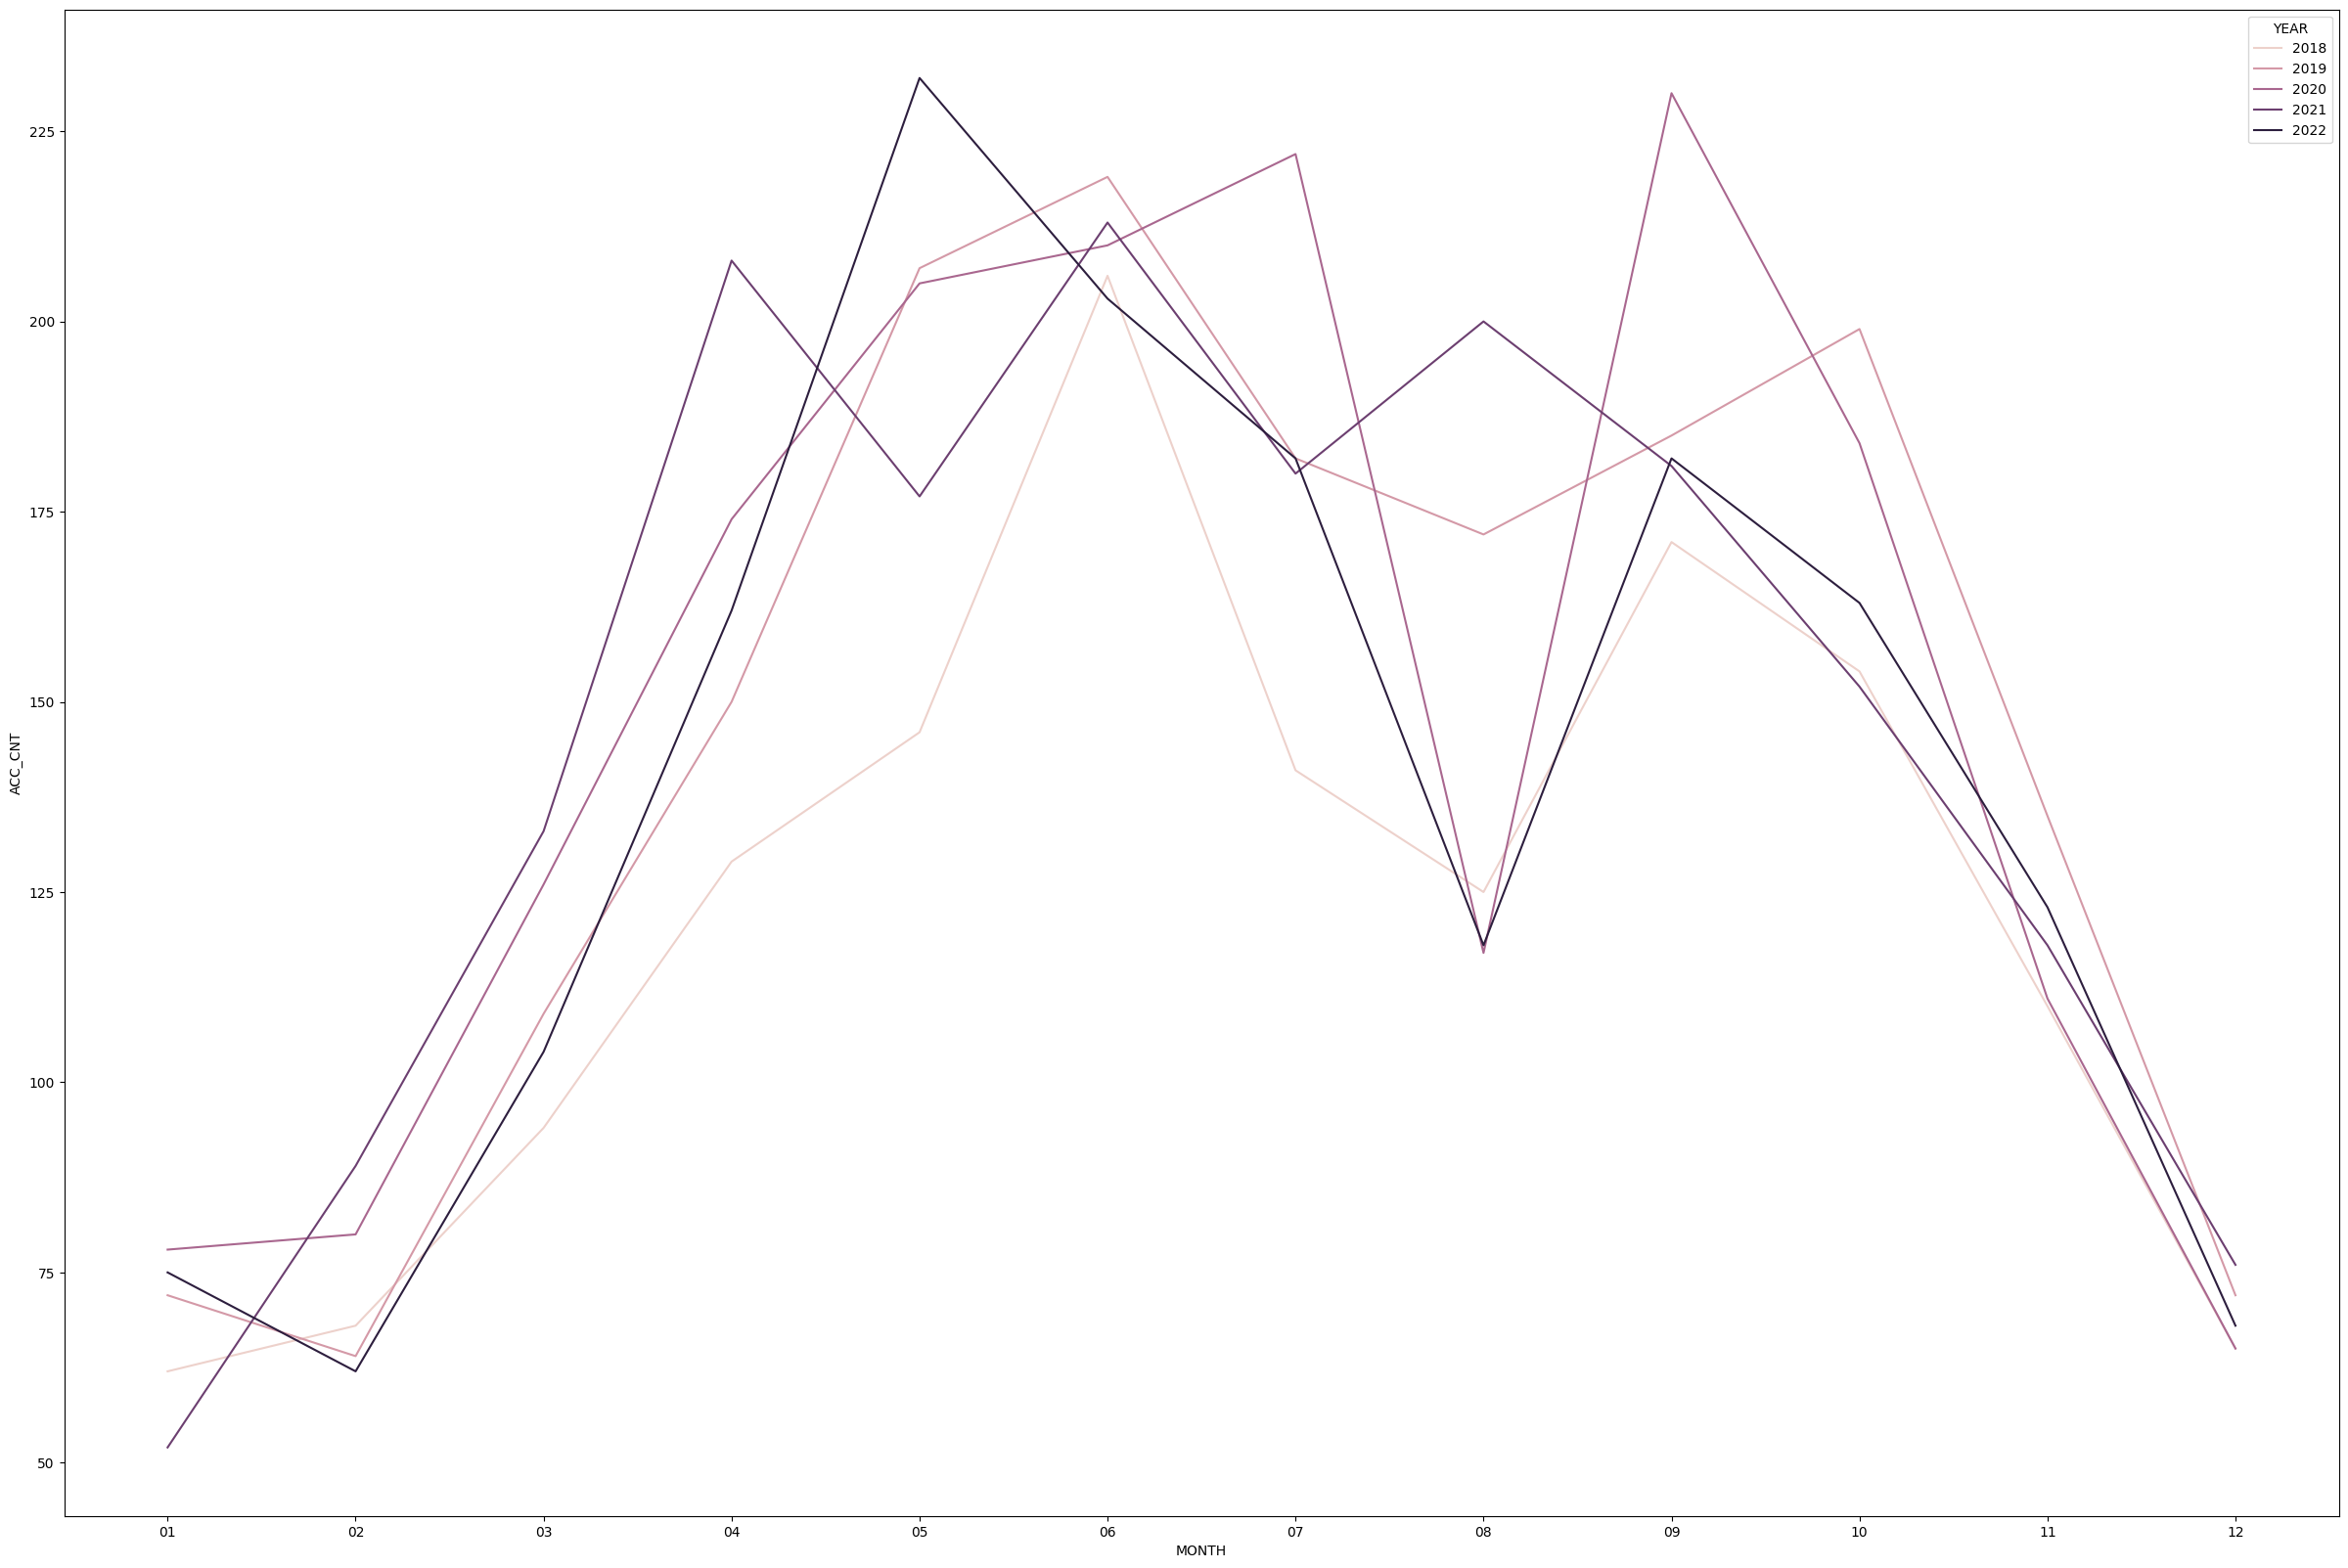

In [22]:
# 월별에 따른 자전거 사고 증가률
plt.figure(figsize=(30, 20)) 
sns.lineplot(x="MONTH", y="ACC_CNT", hue="YEAR",data=violation_accident_cycle_month_group)

In [23]:
#사고유형 BASE_NAME
accitype_accident.head(1) 
accitype_accident_groupby_base_name = accitype_accident.groupby(["BASE_NAME"],as_index=False)[["ACC_CNT"]].sum()

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

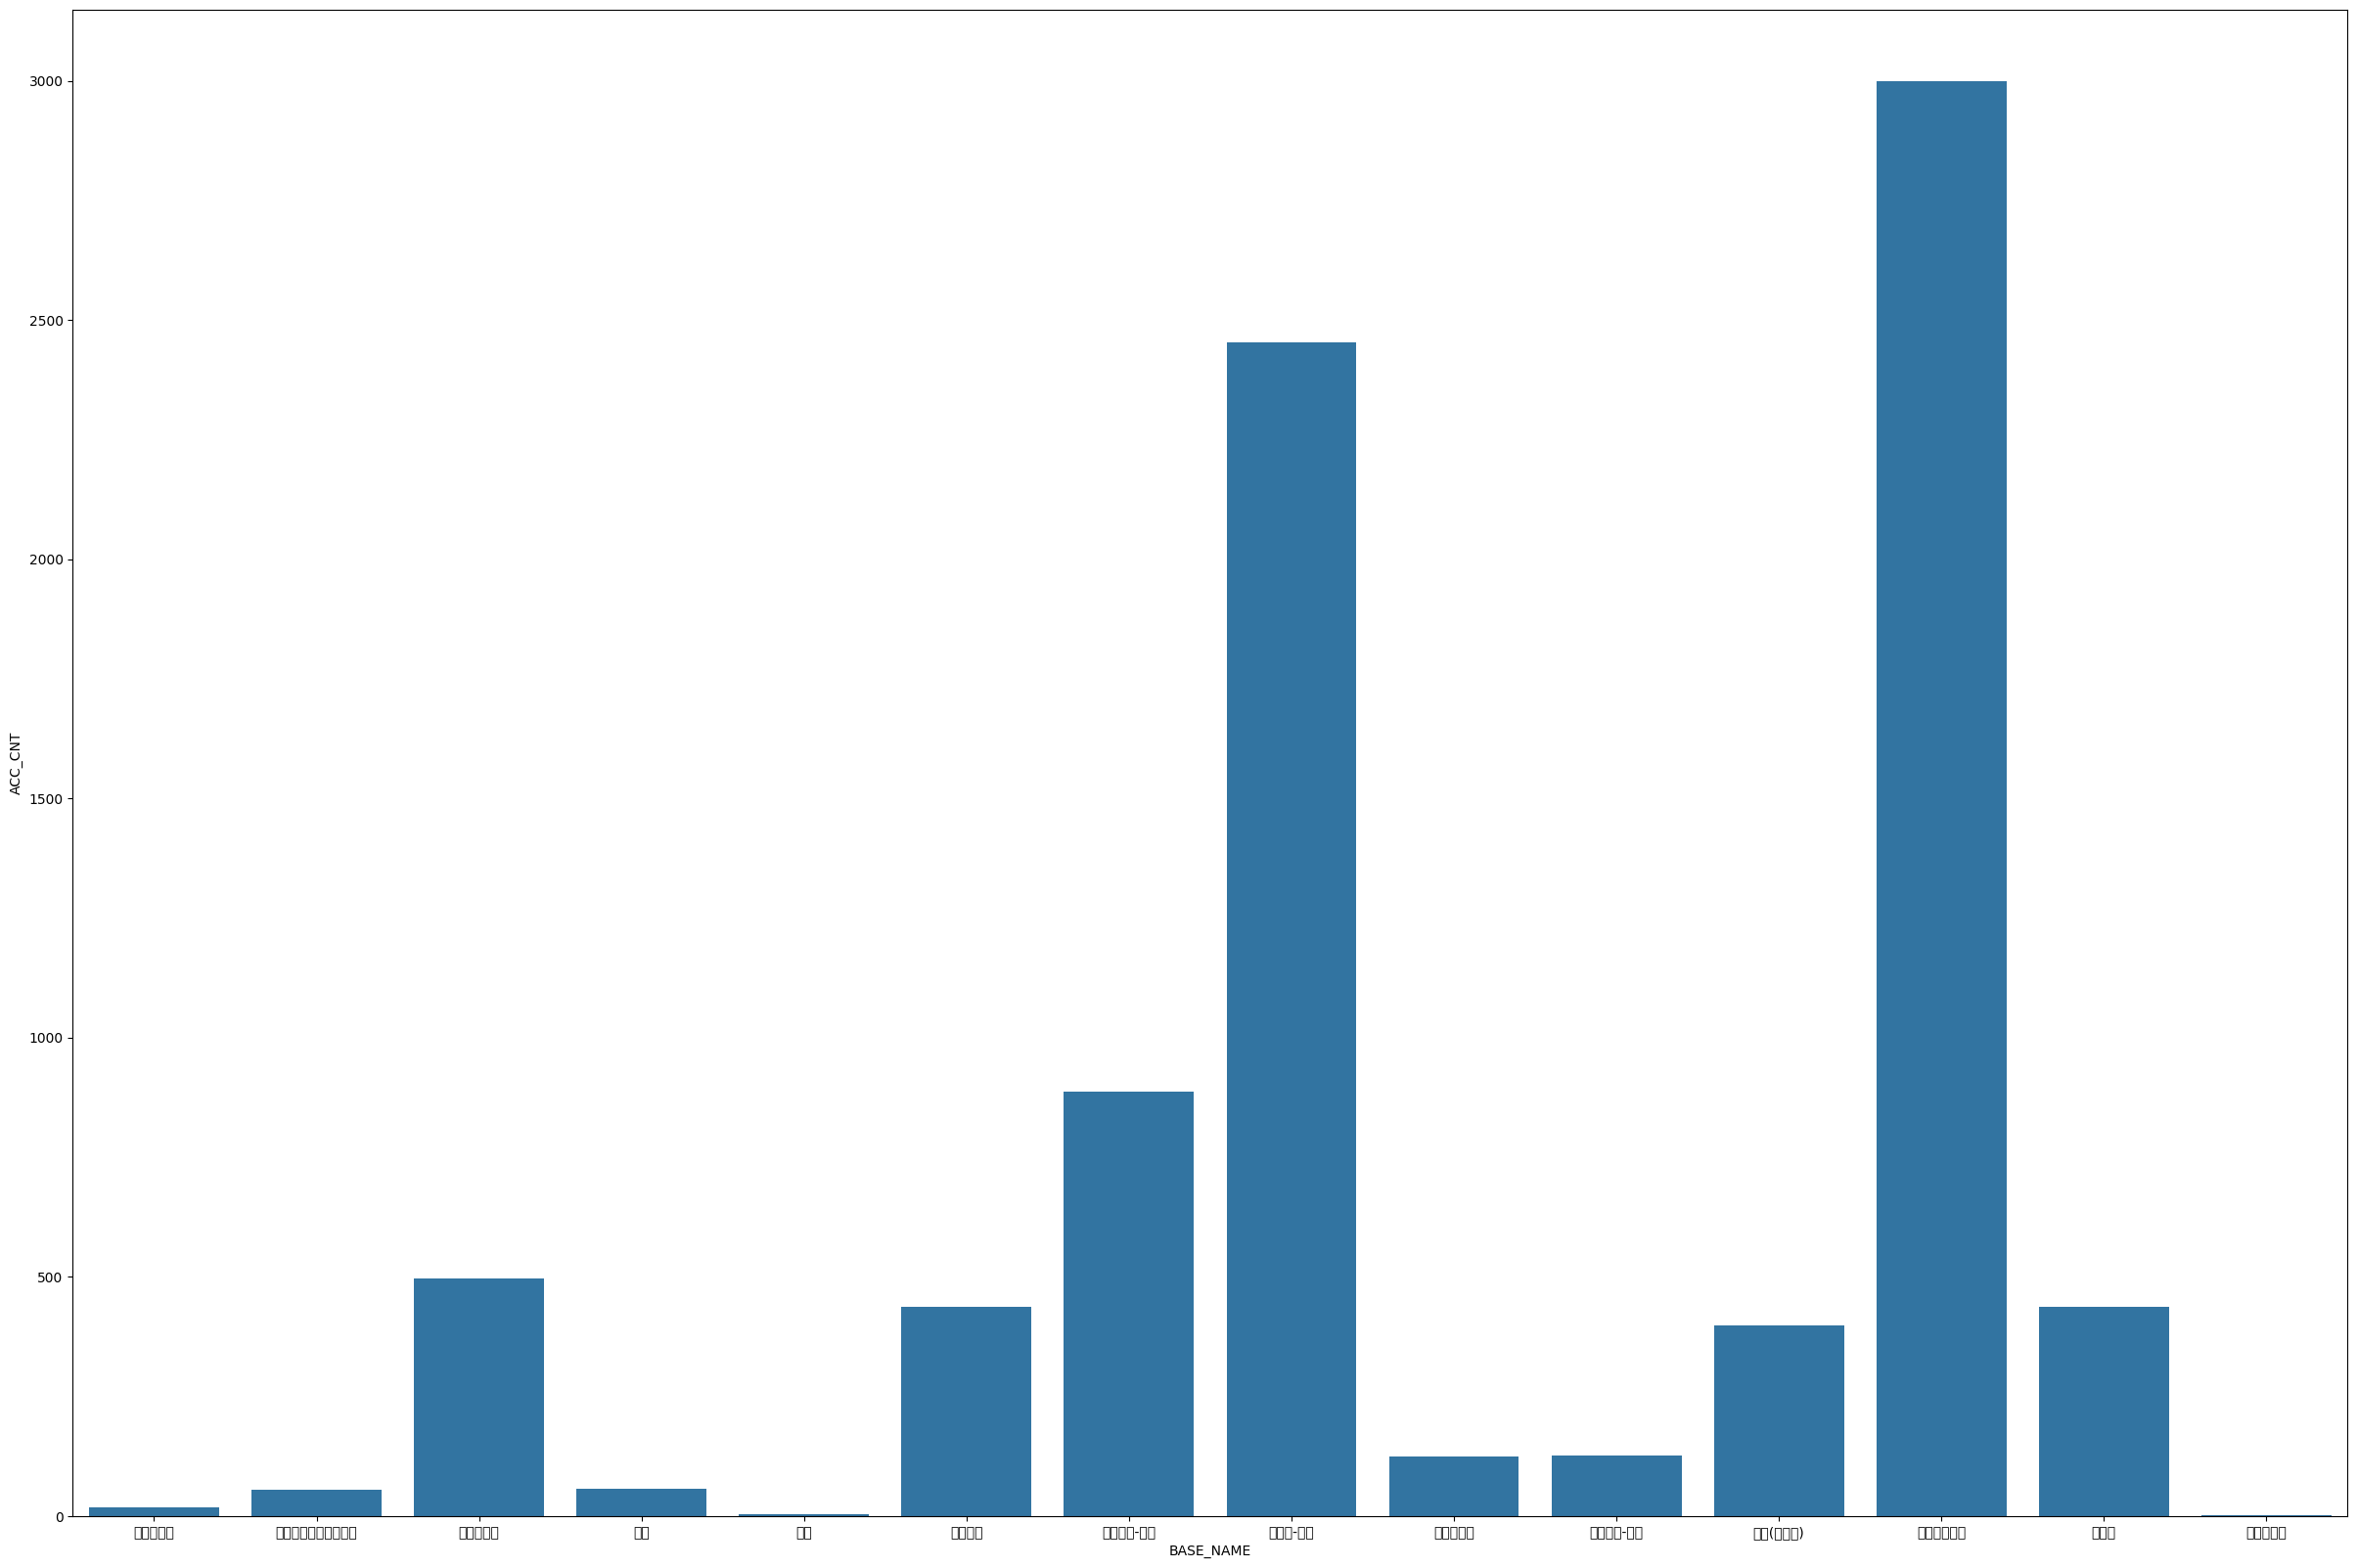

In [24]:
# "BASE_NAME"별로 ACC_CNT 시각화 DEATH_CNT 추가
plt.figure(figsize=(30, 20)) 
# sns.barplot(x=violation_accident_groupby_base_name["BASE_NAME"], y=violation_accident_groupby_base_name["ACC_CNT"])
sns.barplot(x="BASE_NAME", y="ACC_CNT", data=accitype_accident_groupby_base_name)
# plt.title('violation_accident')
# plt.show()

In [21]:
accitype_accident.columns

Index(['JIJACE_NM', 'CHISA', 'ACC_HUM', 'SIDO_CD', 'GUBUN_NM', 'SLTWD_CNT',
       'SERI_ACC', 'SIDO_NM', 'AC_MODE', 'CRT_JIJACE_CD', 'BASE_NAME',
       'BIG_CNT', 'PSGT_CNT', 'WND_ACC', 'ACC_CNT', 'TRK_CNT', 'DEATH_CNT',
       'BASE_CODE', 'WND_CNT', 'DEATH_ACC', 'GUBUN', 'SERI_CNT', 'SLTWD_ACC',
       'YEAR', 'BASE_CATEGORY'],
      dtype='object')

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

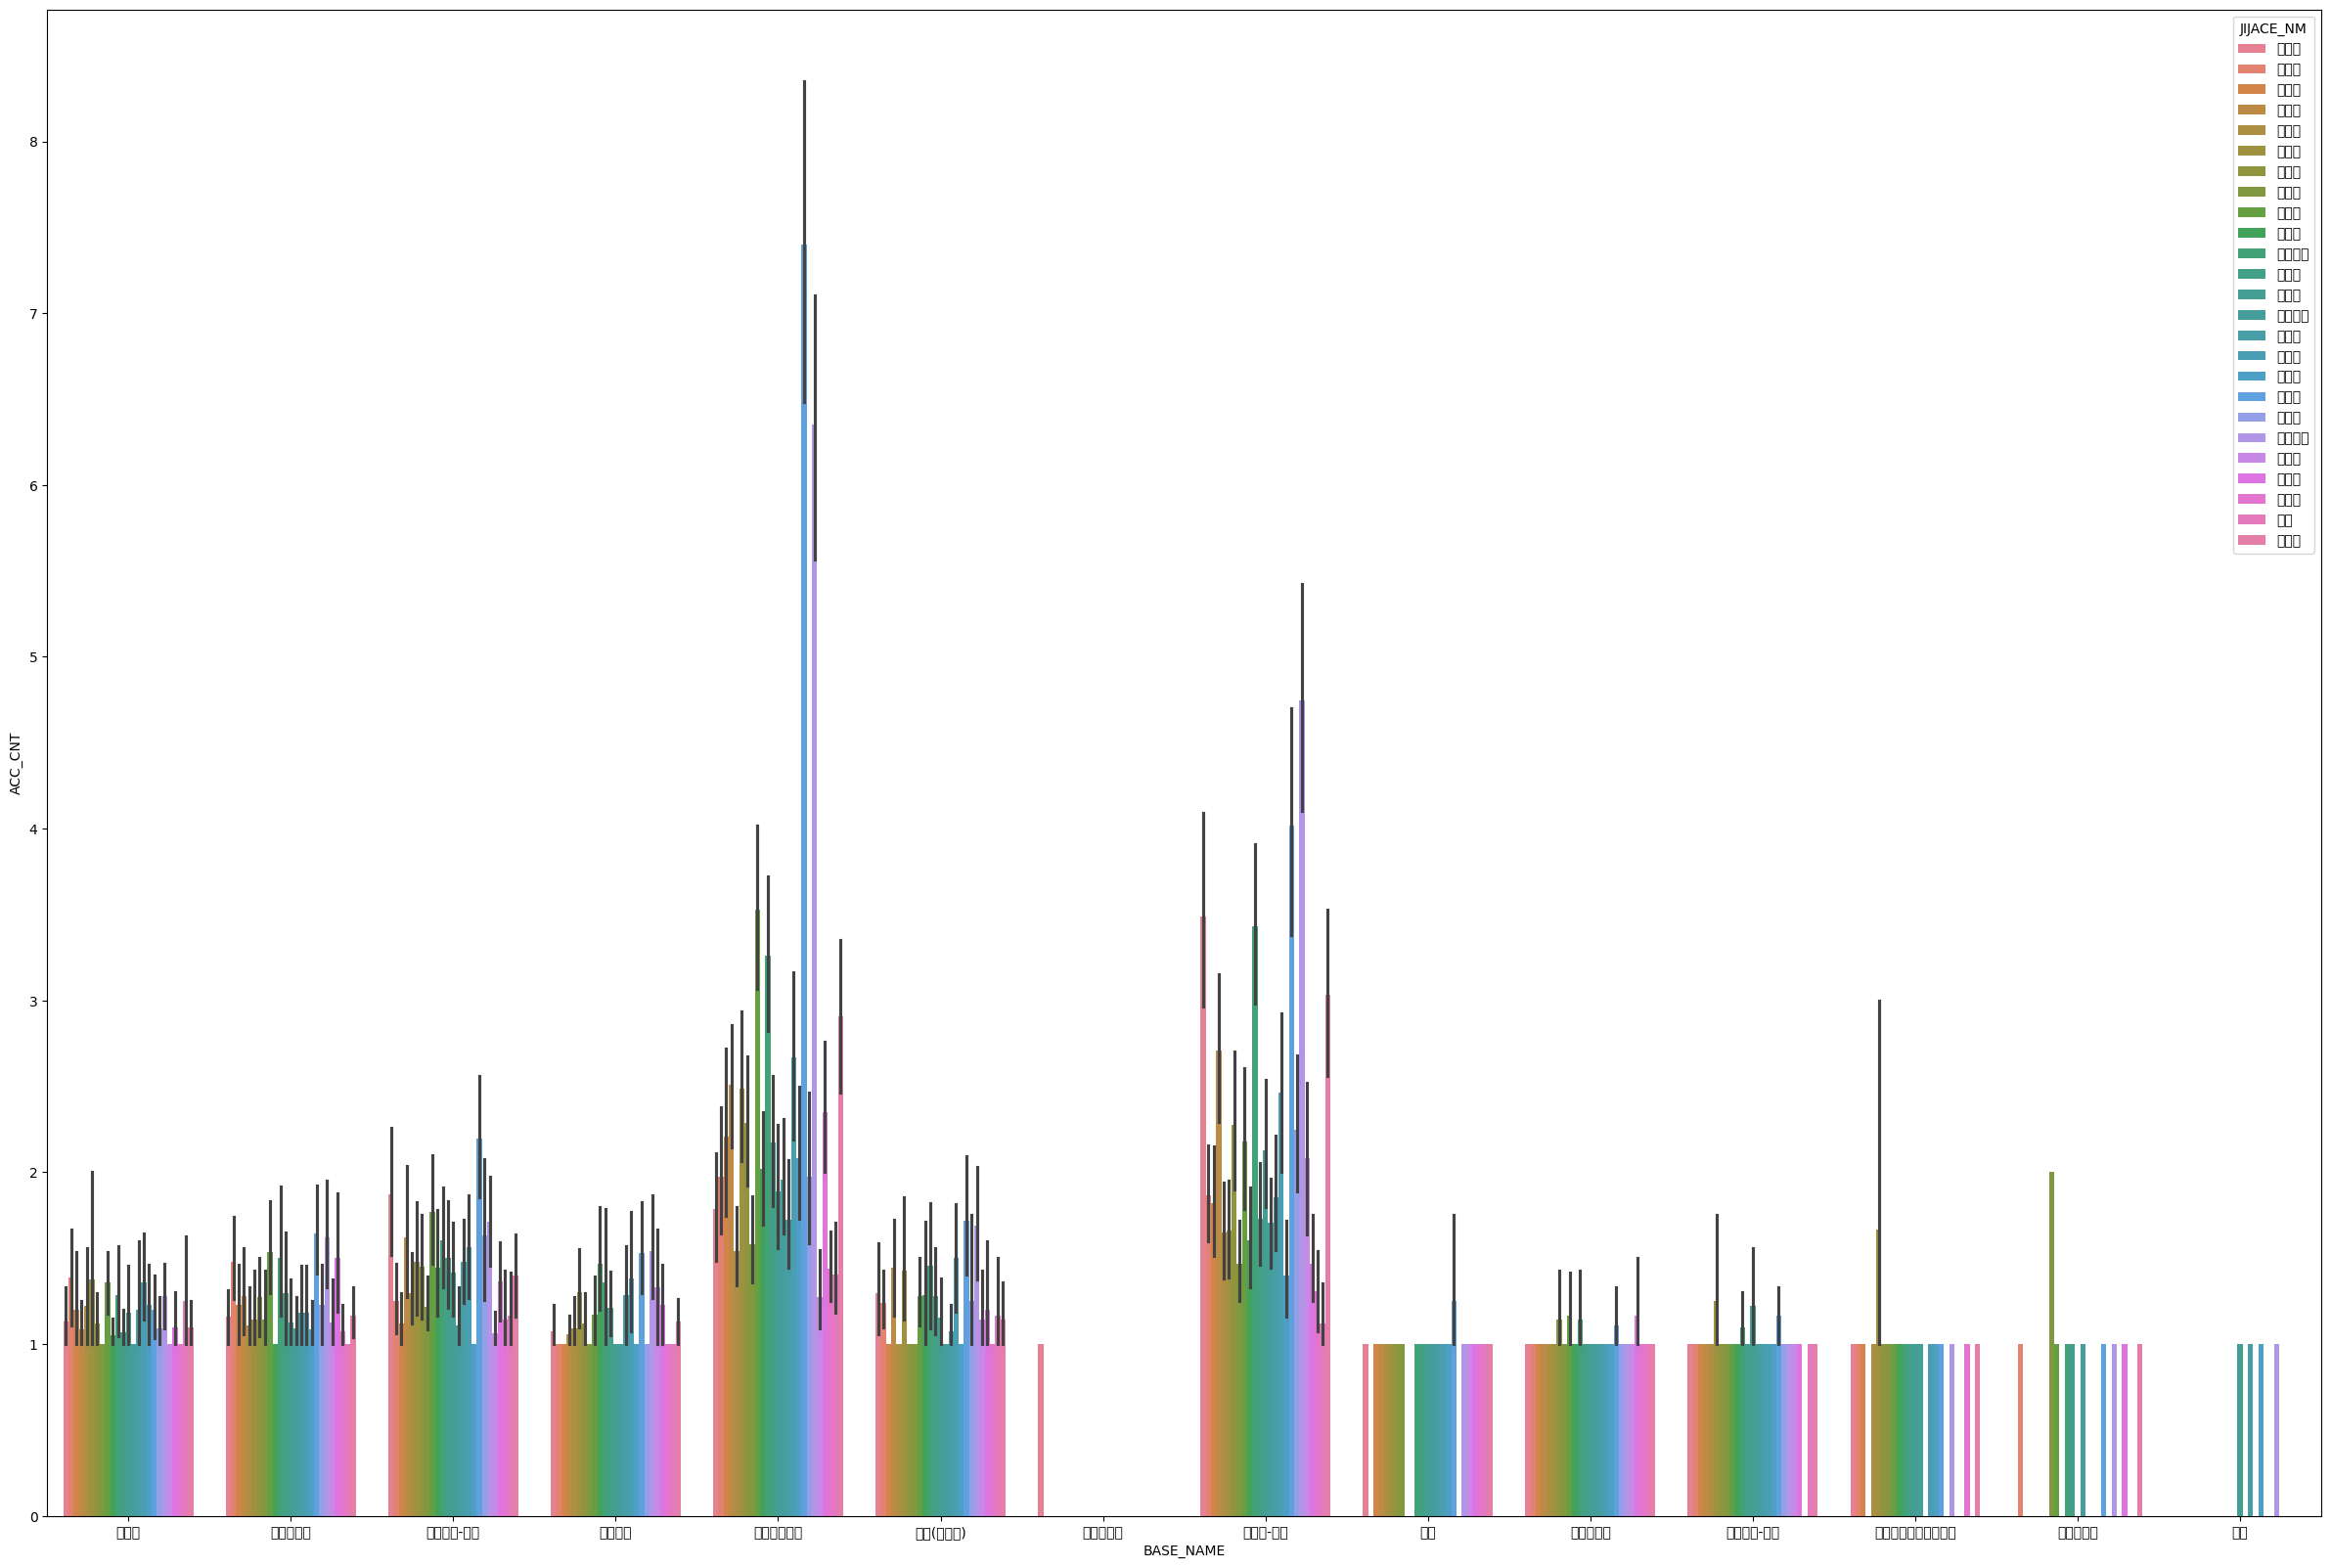

In [25]:
plt.figure(figsize=(30, 20)) 
# sns.barplot(x=violation_accident_groupby_base_name["BASE_NAME"], y=violation_accident_groupby_base_name["ACC_CNT"])
sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="JIJACE_NM",data=accitype_accident)
# plt.title('violation_accident')
# plt.show()

In [23]:
age_accident.head(1)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,GUBUN_NM,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,16,11000,승용,12,2,서울,A,11680,...,0,0,10,2,0,01,2,7,2018,연령대


In [12]:
accitype_accident.columns

Index(['JIJACE_NM', 'CHISA', 'ACC_HUM', 'SIDO_CD', 'GUBUN_NM', 'SLTWD_CNT',
       'SERI_ACC', 'SIDO_NM', 'AC_MODE', 'CRT_JIJACE_CD', 'BASE_NAME',
       'BIG_CNT', 'PSGT_CNT', 'WND_ACC', 'ACC_CNT', 'TRK_CNT', 'DEATH_CNT',
       'BASE_CODE', 'WND_CNT', 'DEATH_ACC', 'GUBUN', 'SERI_CNT', 'SLTWD_ACC',
       'YEAR', 'BASE_CATEGORY'],
      dtype='object')

In [26]:
# 연령대별 사고 
age_accident_group = age_accident.groupby(["BASE_NAME"],as_index=False)[["ACC_CNT"]].sum()

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

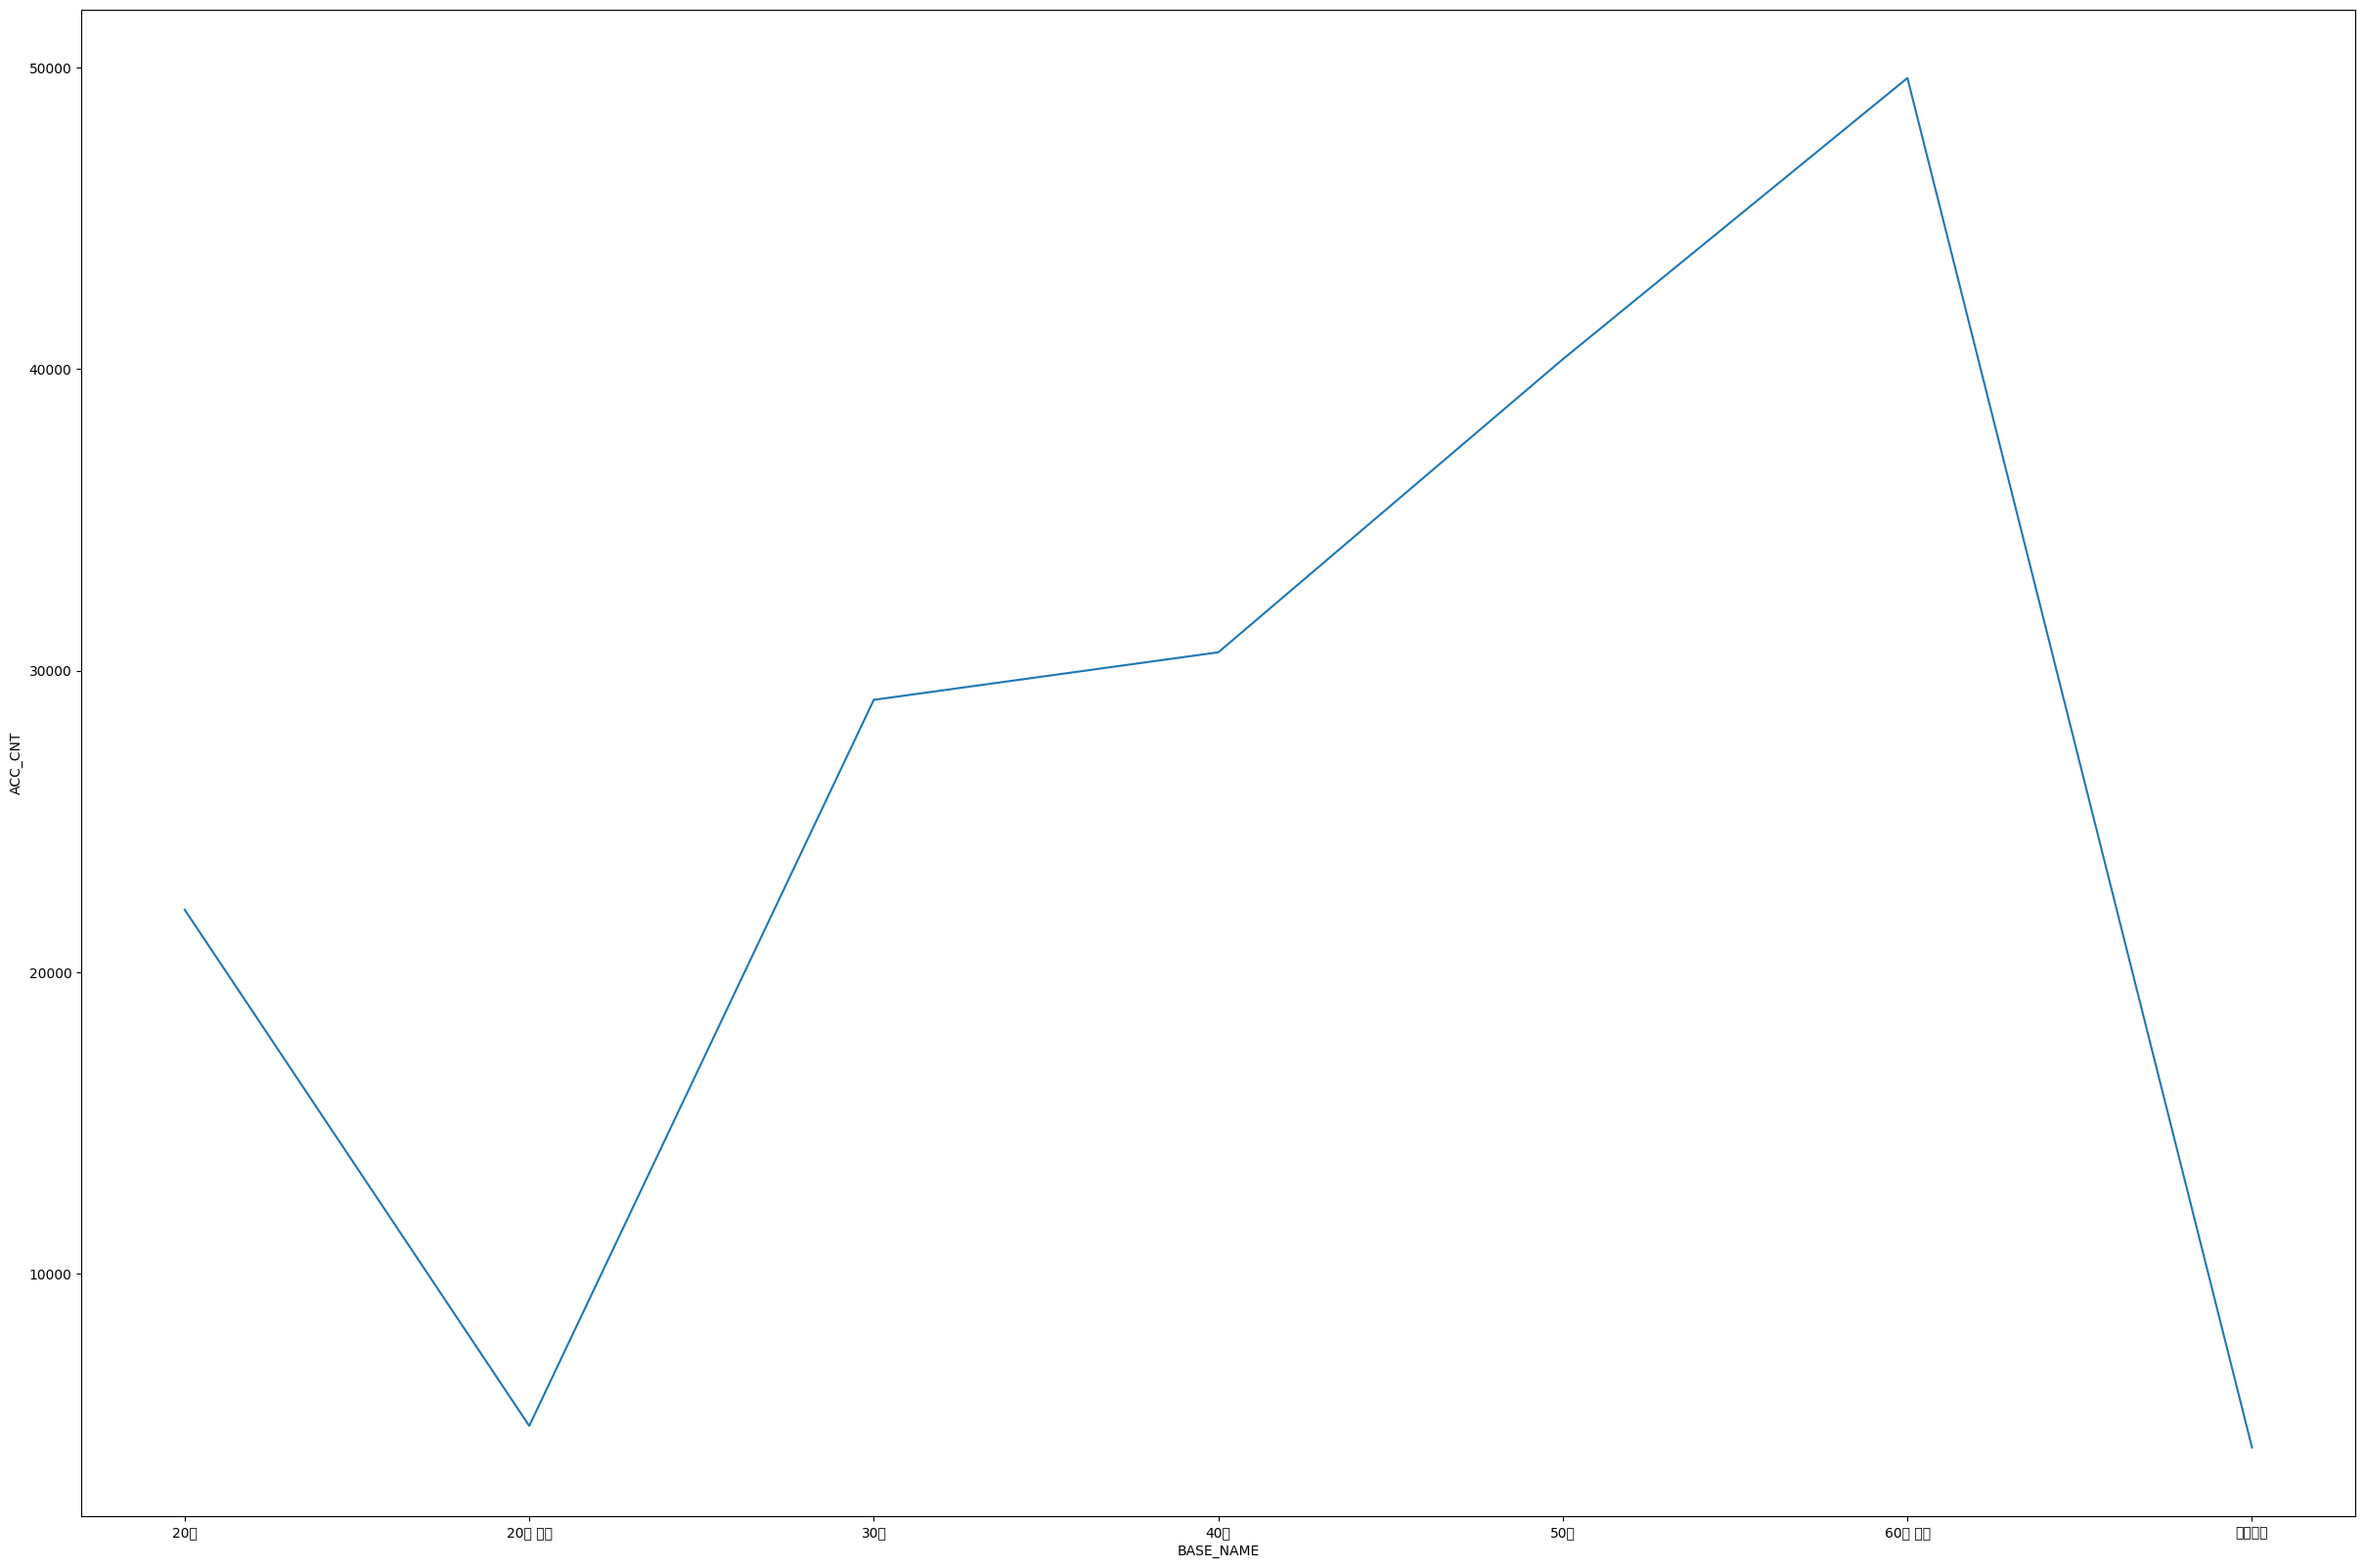

In [27]:
# "BASE_NAME"별로 ACC_CNT 시각화 DEATH_CNT 추가
plt.figure(figsize=(30, 20)) 
sns.lineplot(x="BASE_NAME", y="ACC_CNT", data=age_accident_group)
# plt.show()

In [27]:
# age_accident.BASE_NAME.unique()

In [28]:
age_accident_cycle_month.head(1)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,1,11000,01,1,0,서울,A,11680,...,0,0,10,0,0,01,0,1,2018,연령대


In [29]:
# sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="MONTH",data=age_accident_cycle_month)

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

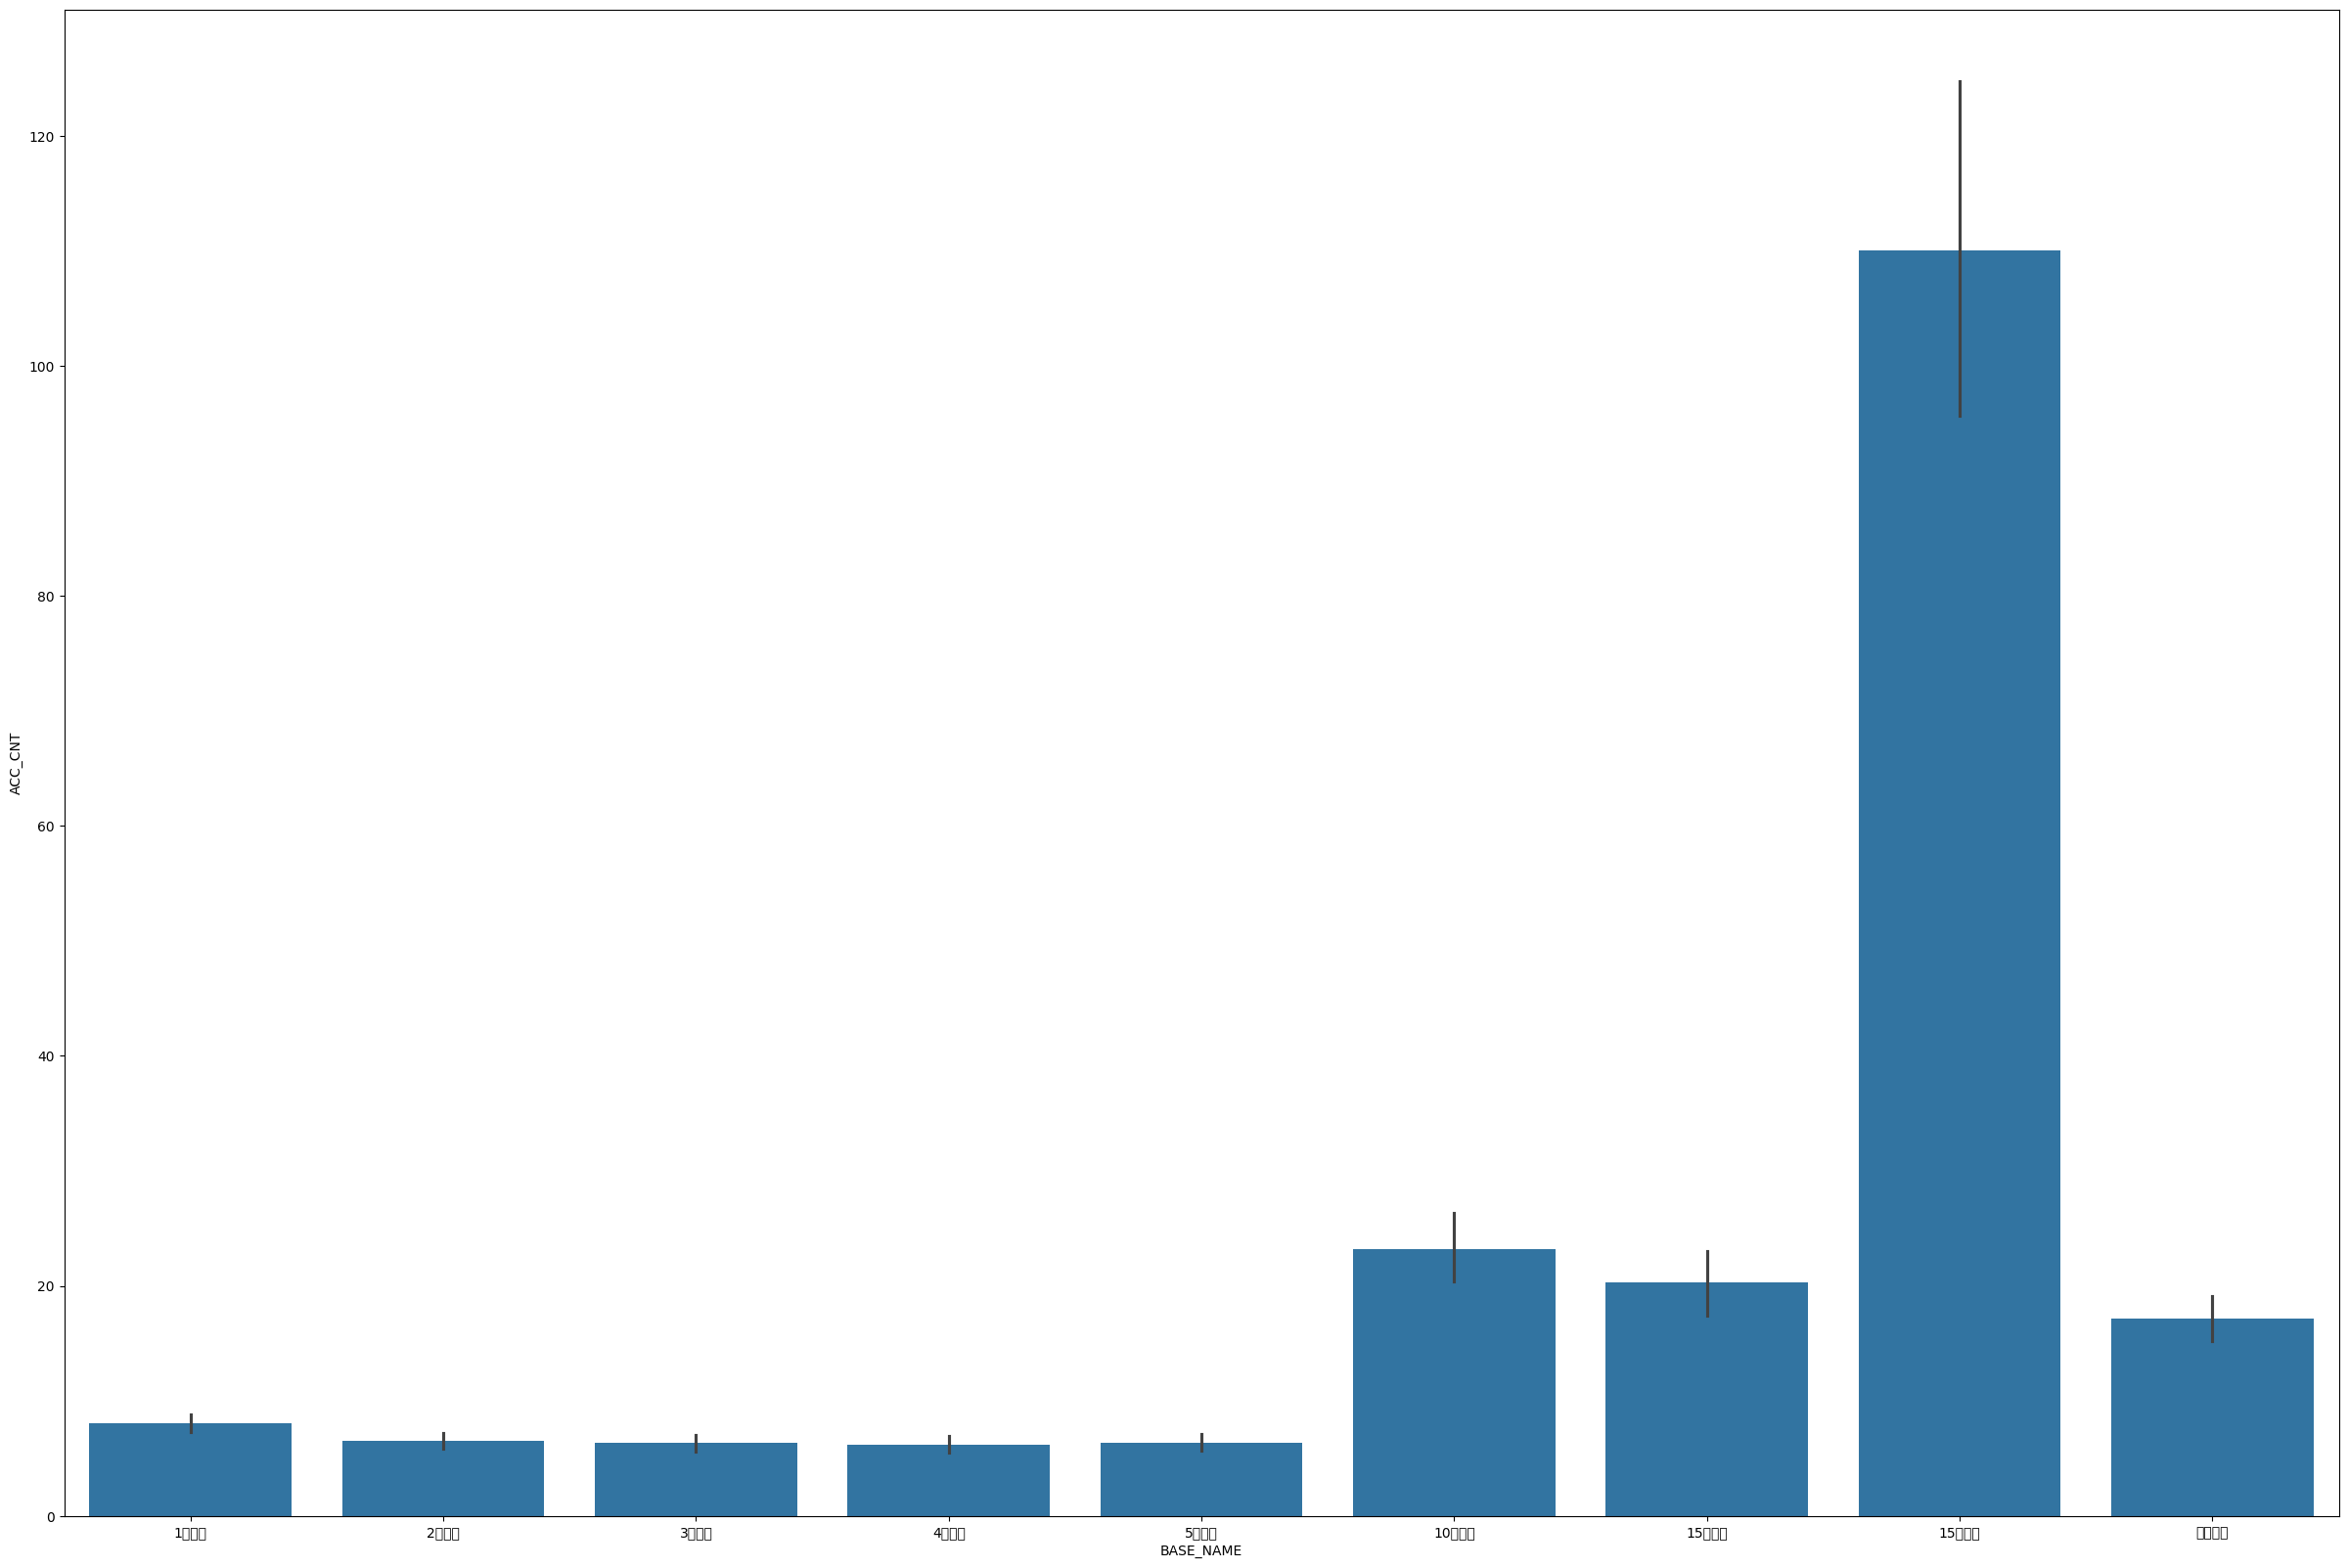

In [28]:
#운전경력에 따른 사고
carexp_accident.head(1)
plt.figure(figsize=(30, 20)) 
sns.barplot(x="BASE_NAME", y="ACC_CNT", data=carexp_accident)

<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

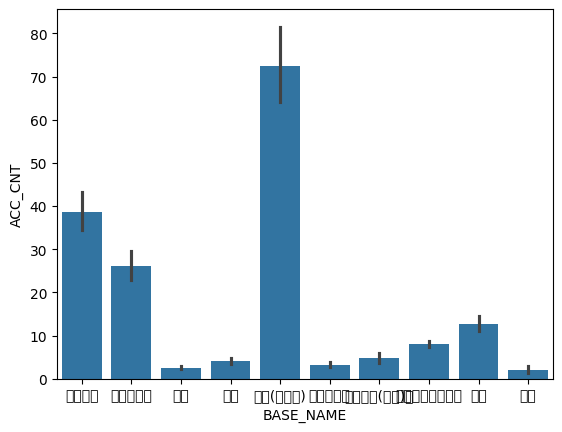

In [29]:
road_accident.head(1)
sns.barplot(x="BASE_NAME", y="ACC_CNT", data=road_accident)

In [32]:
# weather_accident.BASE_NAME.unique()

In [33]:
# weather_accident.head(1)
# sns.barplot(x="BASE_NAME", y="ACC_CNT", data=weather_accident)

In [33]:
jijace_list=[["강남구" , 11680] , ["강동구" ,11740], ["강북구" , 11305], ["강서구" , 11500],  ["관악구", 11620], ["광진구" , 11215], ["구로구" ,11530],
            ["금천구",11545], ["노원구" , 11350] ,["도봉구",11320], ["동대문구",11230], ["동작구" , 11590], ["마포구" ,11440] , ["서대문구" ,11410] , ["서초구", 11650],
            ["성동구" , 11200], ["성북구" , 11290], ["송파구" , 11710], ["양천구" ,11470], ["영등포구" , 11560], ["용산구" , 11170], ["은평구" , 11380],
            ["종로구", 11110] , ["중구" , 11140], ["중랑구",11260]]

In [34]:
year_list=[2018,2019,2020,2021,2022]

In [35]:
url="https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tgsearch01_AJAX.jsp" #2022~18년 서울전체 위반유형에 따른 시간비교
payload={"gubun":"S1203", 
"mid":"S1203",
"sYear":"2022", 
"eYear":"2022", 
"sido":"11000",
"jijace":"11680",  
"kind1":"s102",
"kind2":"s1025", #평일/휴
"cartype":"carall"} 
# r = requests.post(url, data=payload)
# bs = eval(r.text)
# time_violation = pd.DataFrame(bs)

In [36]:
time_violation=pd.DataFrame()
for i in tqdm(range(len(jijace_list))):
    for j in range(len(year_list)):
        payload["sYear"]=year_list[j]
        payload["eYear"]=year_list[j]
        payload["jijace"]=jijace_list[i][1]
            # print(year_list[j])
            # print(jijace_list[i][1])
        r = requests.post(url, data=payload)
        bs = eval(r.text)
        df = pd.DataFrame(bs)
        df["YEAR"]=year_list[j]
        time_violation = pd.concat([time_violation, df], axis = 0)

100%|███████████████████████████████████████████████████████████████████████████████████| 25/25 [01:20<00:00,  3.22s/it]


In [38]:
time_violation.columns

Index(['JIJACE_NM', 'CHISA', 'ACC_HUM', 'SIDO_CD', 'GUBUN_NM', 'SLTWD_CNT',
       'SERI_ACC', 'SIDO_NM', 'AC_MODE', 'CRT_JIJACE_CD', 'BASE_NAME',
       'BIG_CNT', 'PSGT_CNT', 'WND_ACC', 'ACC_CNT', 'TRK_CNT', 'DEATH_CNT',
       'BASE_CODE', 'WND_CNT', 'DEATH_ACC', 'GUBUN', 'SERI_CNT', 'SLTWD_ACC',
       'YEAR'],
      dtype='object')

In [39]:
# 시간대에 따른 위반유형별 사고

In [40]:
# time_violation.loc[0]

In [37]:
time_violation.BASE_NAME.unique()

array(['중앙선침범', '신호위반', '안전거리미확보', '불법유턴', '과속', '안전운전불이행', '교차로운행방법위반',
       '보행자보호의무위반', '차로위반', '직진우회전진행방해', '기타', '알수없음'], dtype=object)

In [42]:
# time_violation.GUBUN_NM

<Axes: xlabel='BASE_NAME', ylabel='Count'>

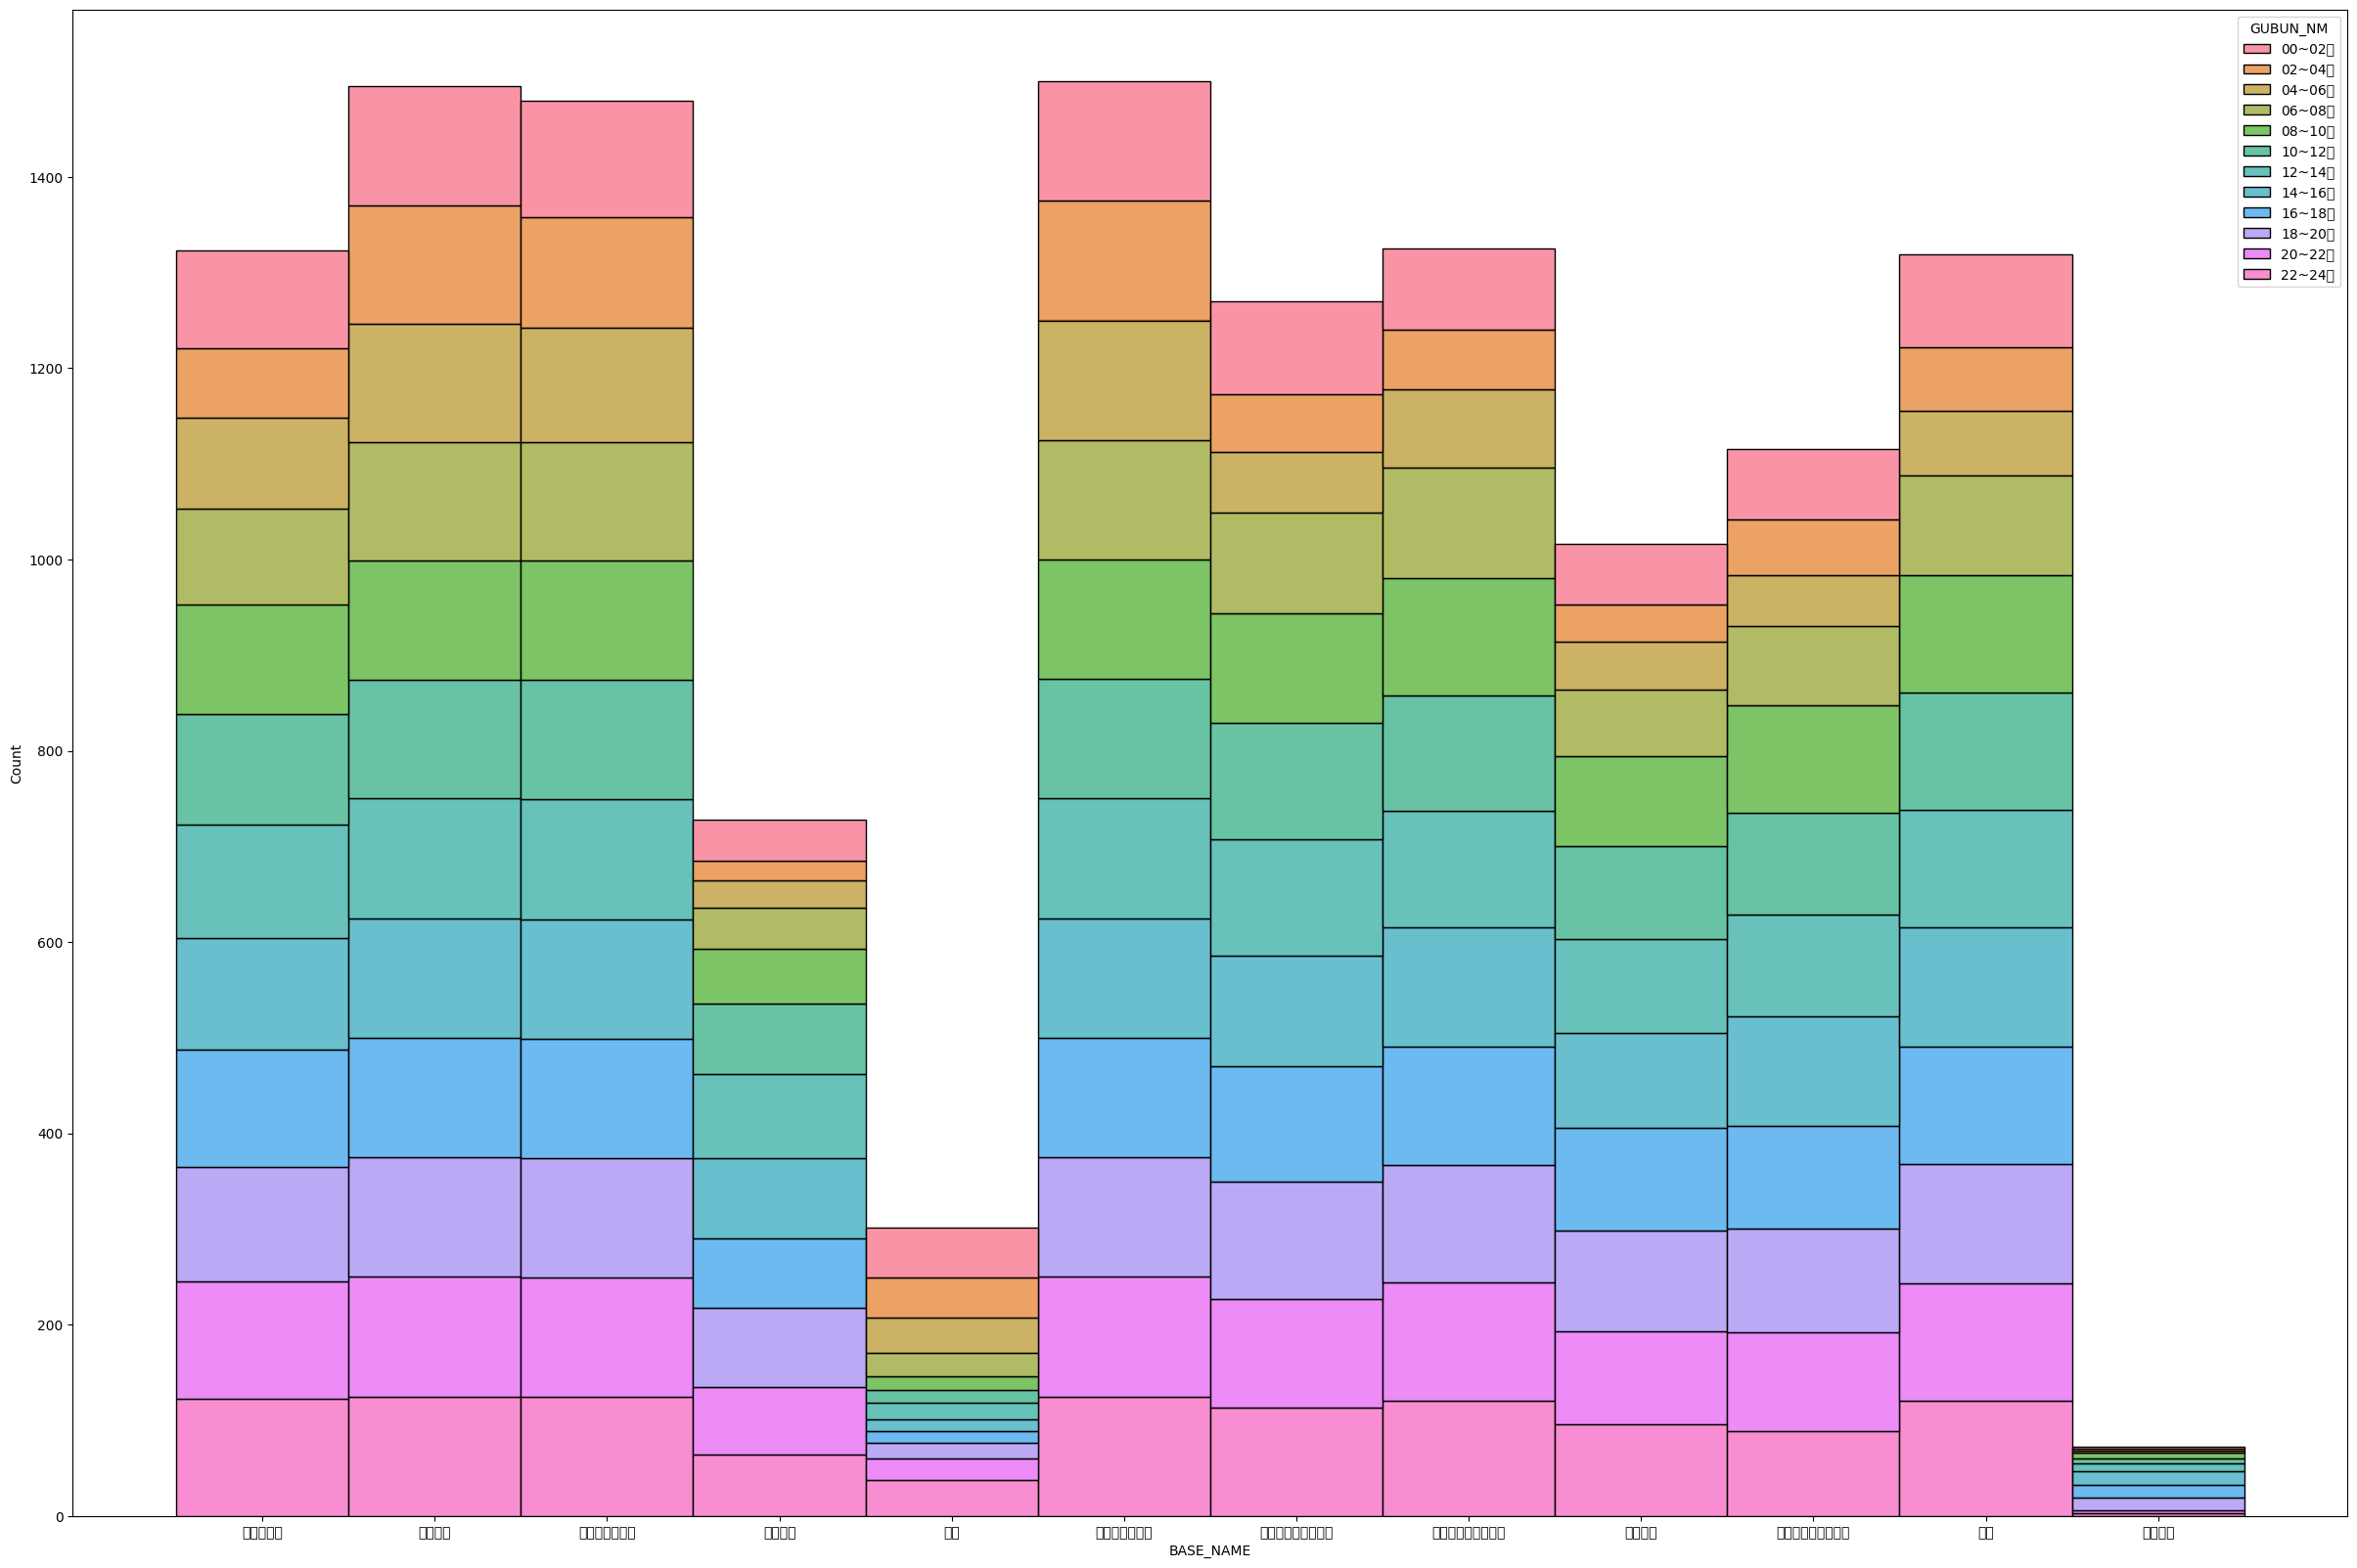

In [38]:
# sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="JIJACE_NM",data=accitype_accident)
plt.figure(figsize=(30, 20))
sns.histplot(data = time_violation, x = 'BASE_NAME', bins = 100, hue = 'GUBUN_NM', multiple='stack')

In [39]:
url="https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tgsearch01_AJAX.jsp" #2022~18년 연령대별에 따른 도주여부
payload={"gubun":"S1179", 
"mid":"S1179",
"sYear":"2022", 
"eYear":"2022", 
"sido":"11000",
"jijace":"11680",  
"kind1":"s105",
"kind2":"s1055", #평일/휴
"cartype":"carall"} 
time_age=pd.DataFrame()
for i in tqdm(range(len(jijace_list))):
    for j in range(len(year_list)):
        payload["sYear"]=year_list[j]
        payload["eYear"]=year_list[j]
        payload["jijace"]=jijace_list[i][1]
            # print(year_list[j])
            # print(jijace_list[i][1])
        r = requests.post(url, data=payload)
        bs = eval(r.text)
        df = pd.DataFrame(bs)
        df["YEAR"]=year_list[j]
        time_age = pd.concat([time_age, df], axis = 0)

100%|███████████████████████████████████████████████████████████████████████████████████| 25/25 [01:18<00:00,  3.16s/it]


In [40]:
time_age.BASE_NAME.unique()

array(['20대 미만', '20대', '30대', '40대', '50대', '60대 이상', '알수없음'],
      dtype=object)

In [41]:
time_age.columns

Index(['JIJACE_NM', 'CHISA', 'ACC_HUM', 'SIDO_CD', 'GUBUN_NM', 'SLTWD_CNT',
       'SERI_ACC', 'SIDO_NM', 'AC_MODE', 'CRT_JIJACE_CD', 'BASE_NAME',
       'BIG_CNT', 'PSGT_CNT', 'WND_ACC', 'ACC_CNT', 'TRK_CNT', 'DEATH_CNT',
       'BASE_CODE', 'WND_CNT', 'DEATH_ACC', 'GUBUN', 'SERI_CNT', 'SLTWD_ACC',
       'YEAR'],
      dtype='object')

In [47]:
# time_age.GUBUN_NM

In [48]:
# time_age

In [42]:
time_age_group = time_age.groupby(["BASE_NAME","GUBUN_NM"],as_index=False)[["ACC_CNT"]].sum()

In [43]:
time_age_group

,BASE_NAME,GUBUN_NM,ACC_CNT
0,20대,아니오,21371
1,20대,예,700
2,20대 미만,아니오,4792
3,20대 미만,예,155
4,30대,아니오,28192
5,30대,예,841
6,40대,아니오,29860
7,40대,예,750
8,50대,아니오,39676
9,50대,예,659


<Axes: xlabel='BASE_NAME', ylabel='ACC_CNT'>

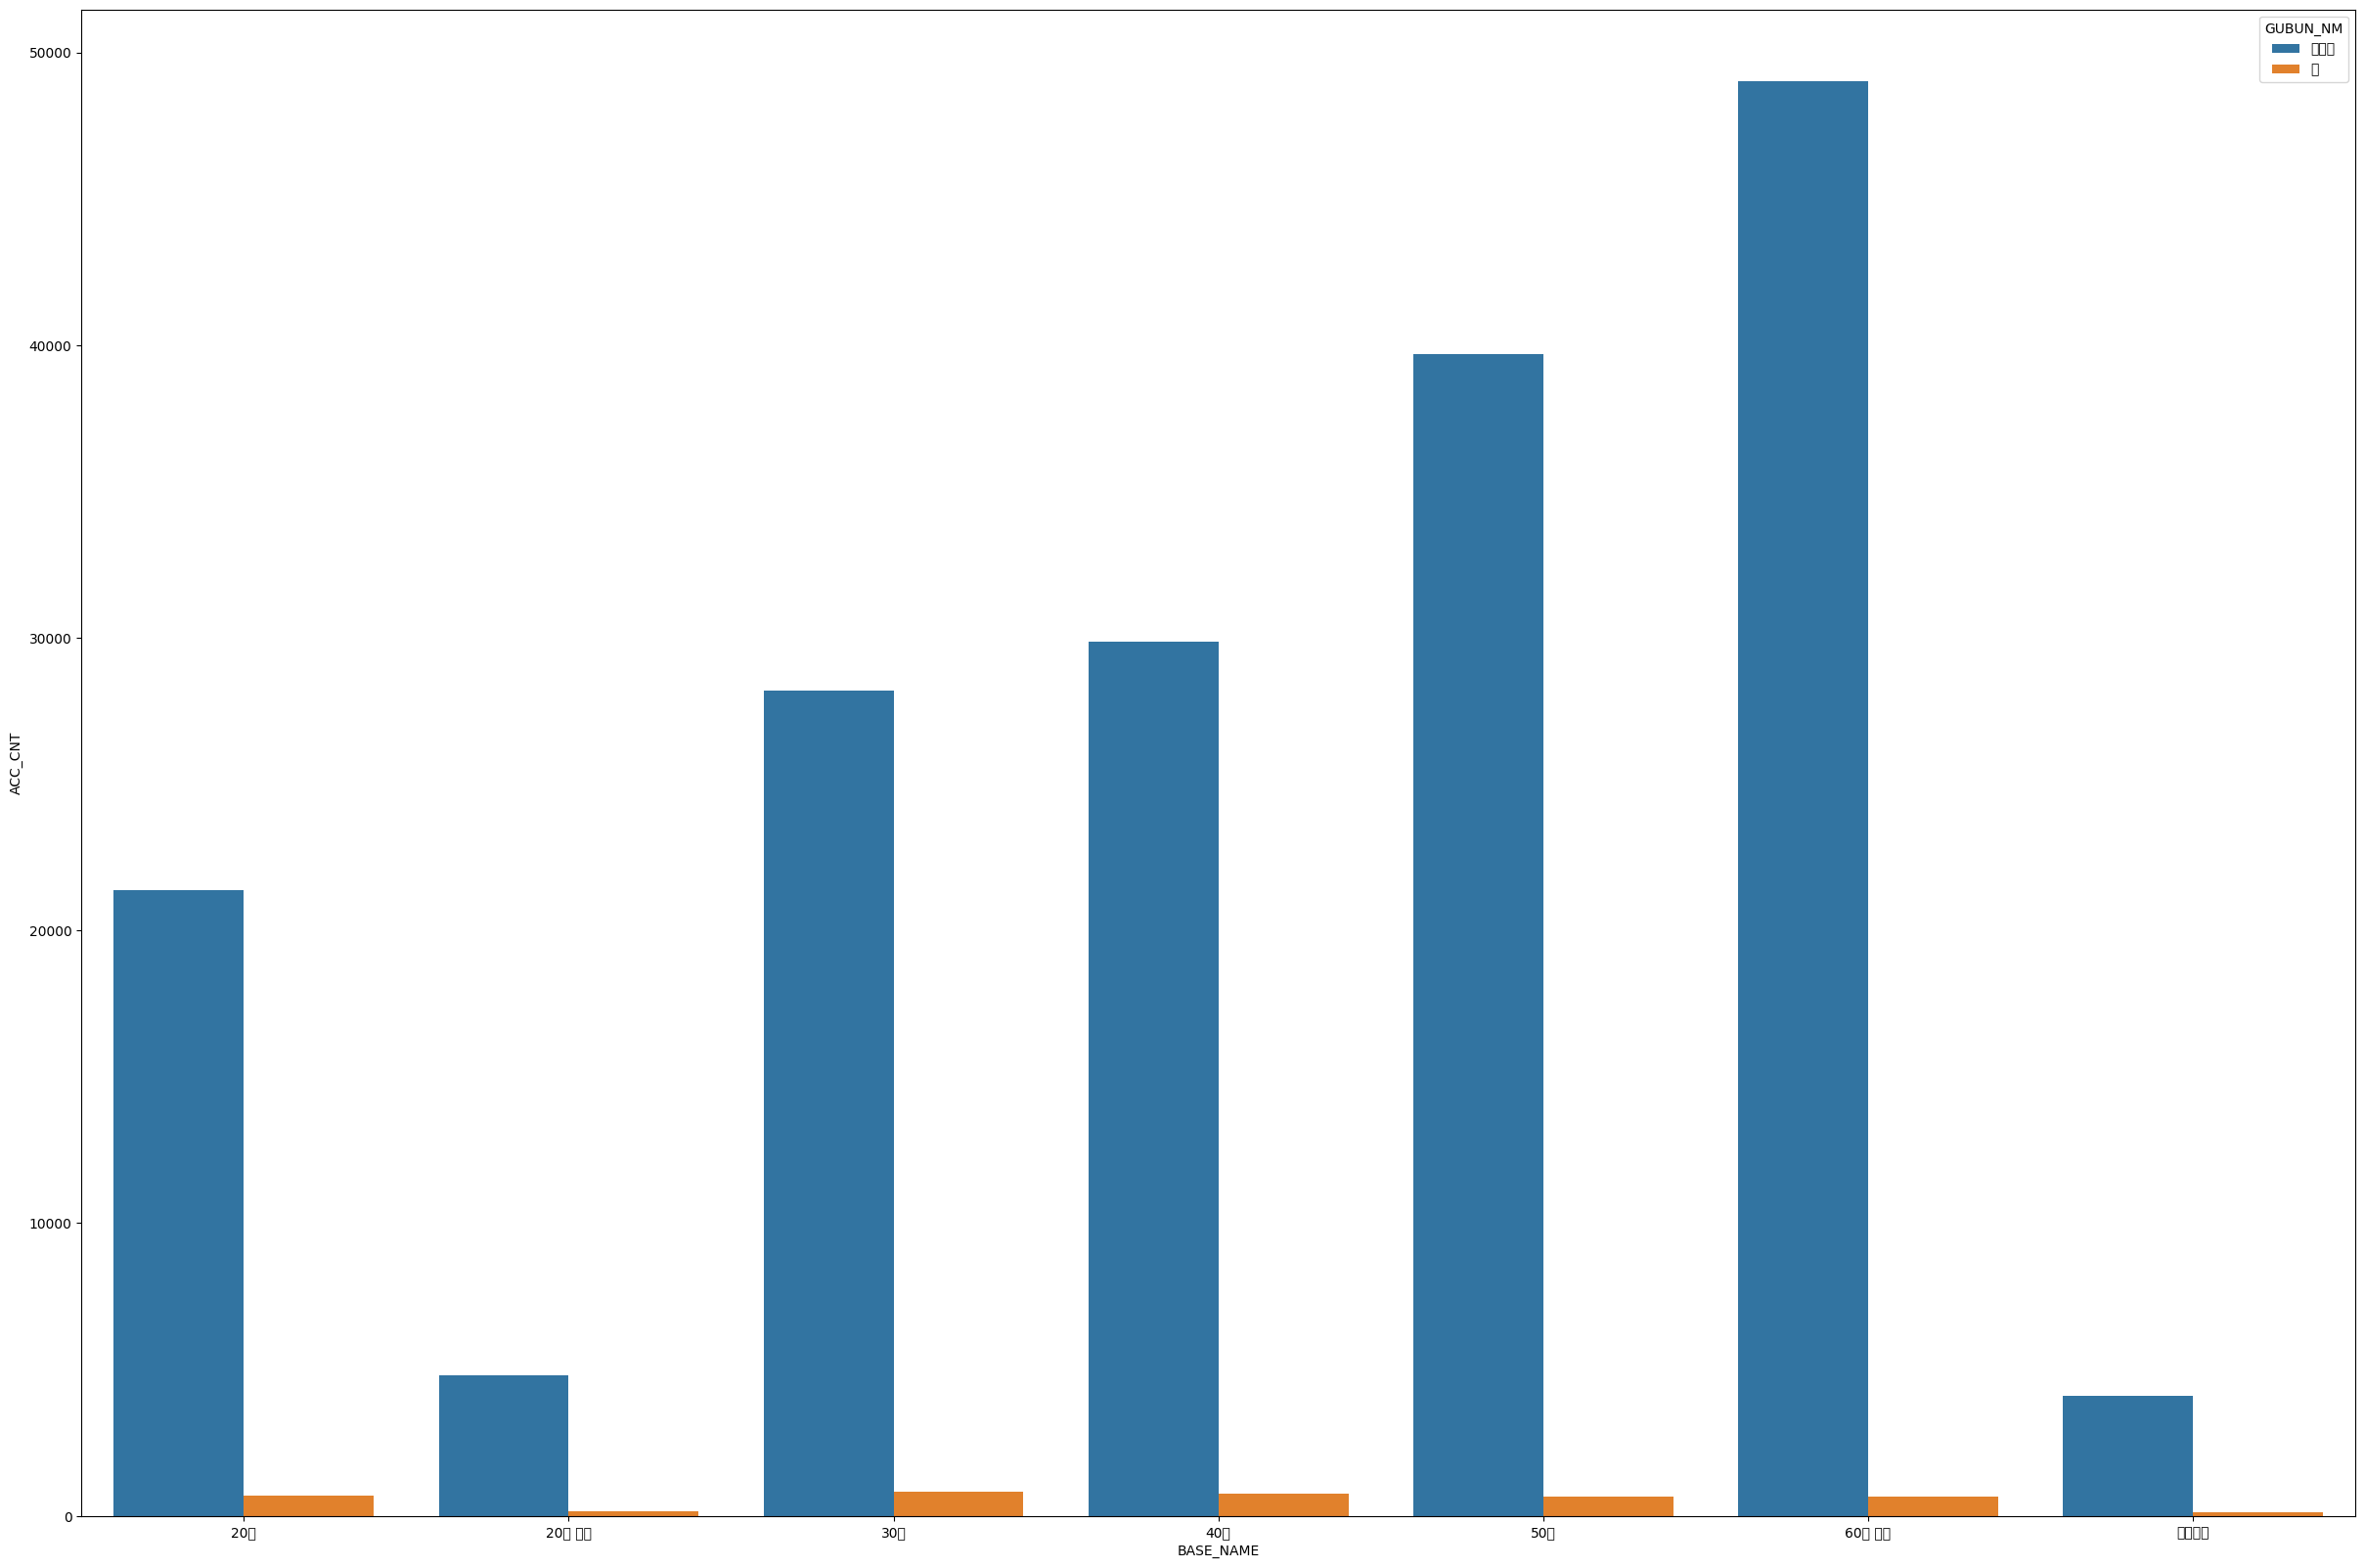

In [44]:
plt.figure(figsize=(30, 20))
sns.barplot(data=time_age_group, x='BASE_NAME', y='ACC_CNT', hue='GUBUN_NM')
#연령대별 사고건수에 대한 도주건수

In [52]:
#해야할일 
# 여성남성 운전사고 종류

In [58]:
time_age.iloc[0]

JIJACE_NM           강남구
CHISA               0.0
ACC_HUM               1
SIDO_CD           11000
GUBUN_NM              예
SLTWD_CNT             0
SERI_ACC              1
SIDO_NM              서울
AC_MODE               A
CRT_JIJACE_CD     11680
BASE_NAME        20대 미만
BIG_CNT               0
PSGT_CNT              0
WND_ACC               0
ACC_CNT               1
TRK_CNT               0
DEATH_CNT             0
BASE_CODE            10
WND_CNT               0
DEATH_ACC             0
GUBUN                01
SERI_CNT              1
SLTWD_ACC             0
YEAR               2018
Name: 0, dtype: object

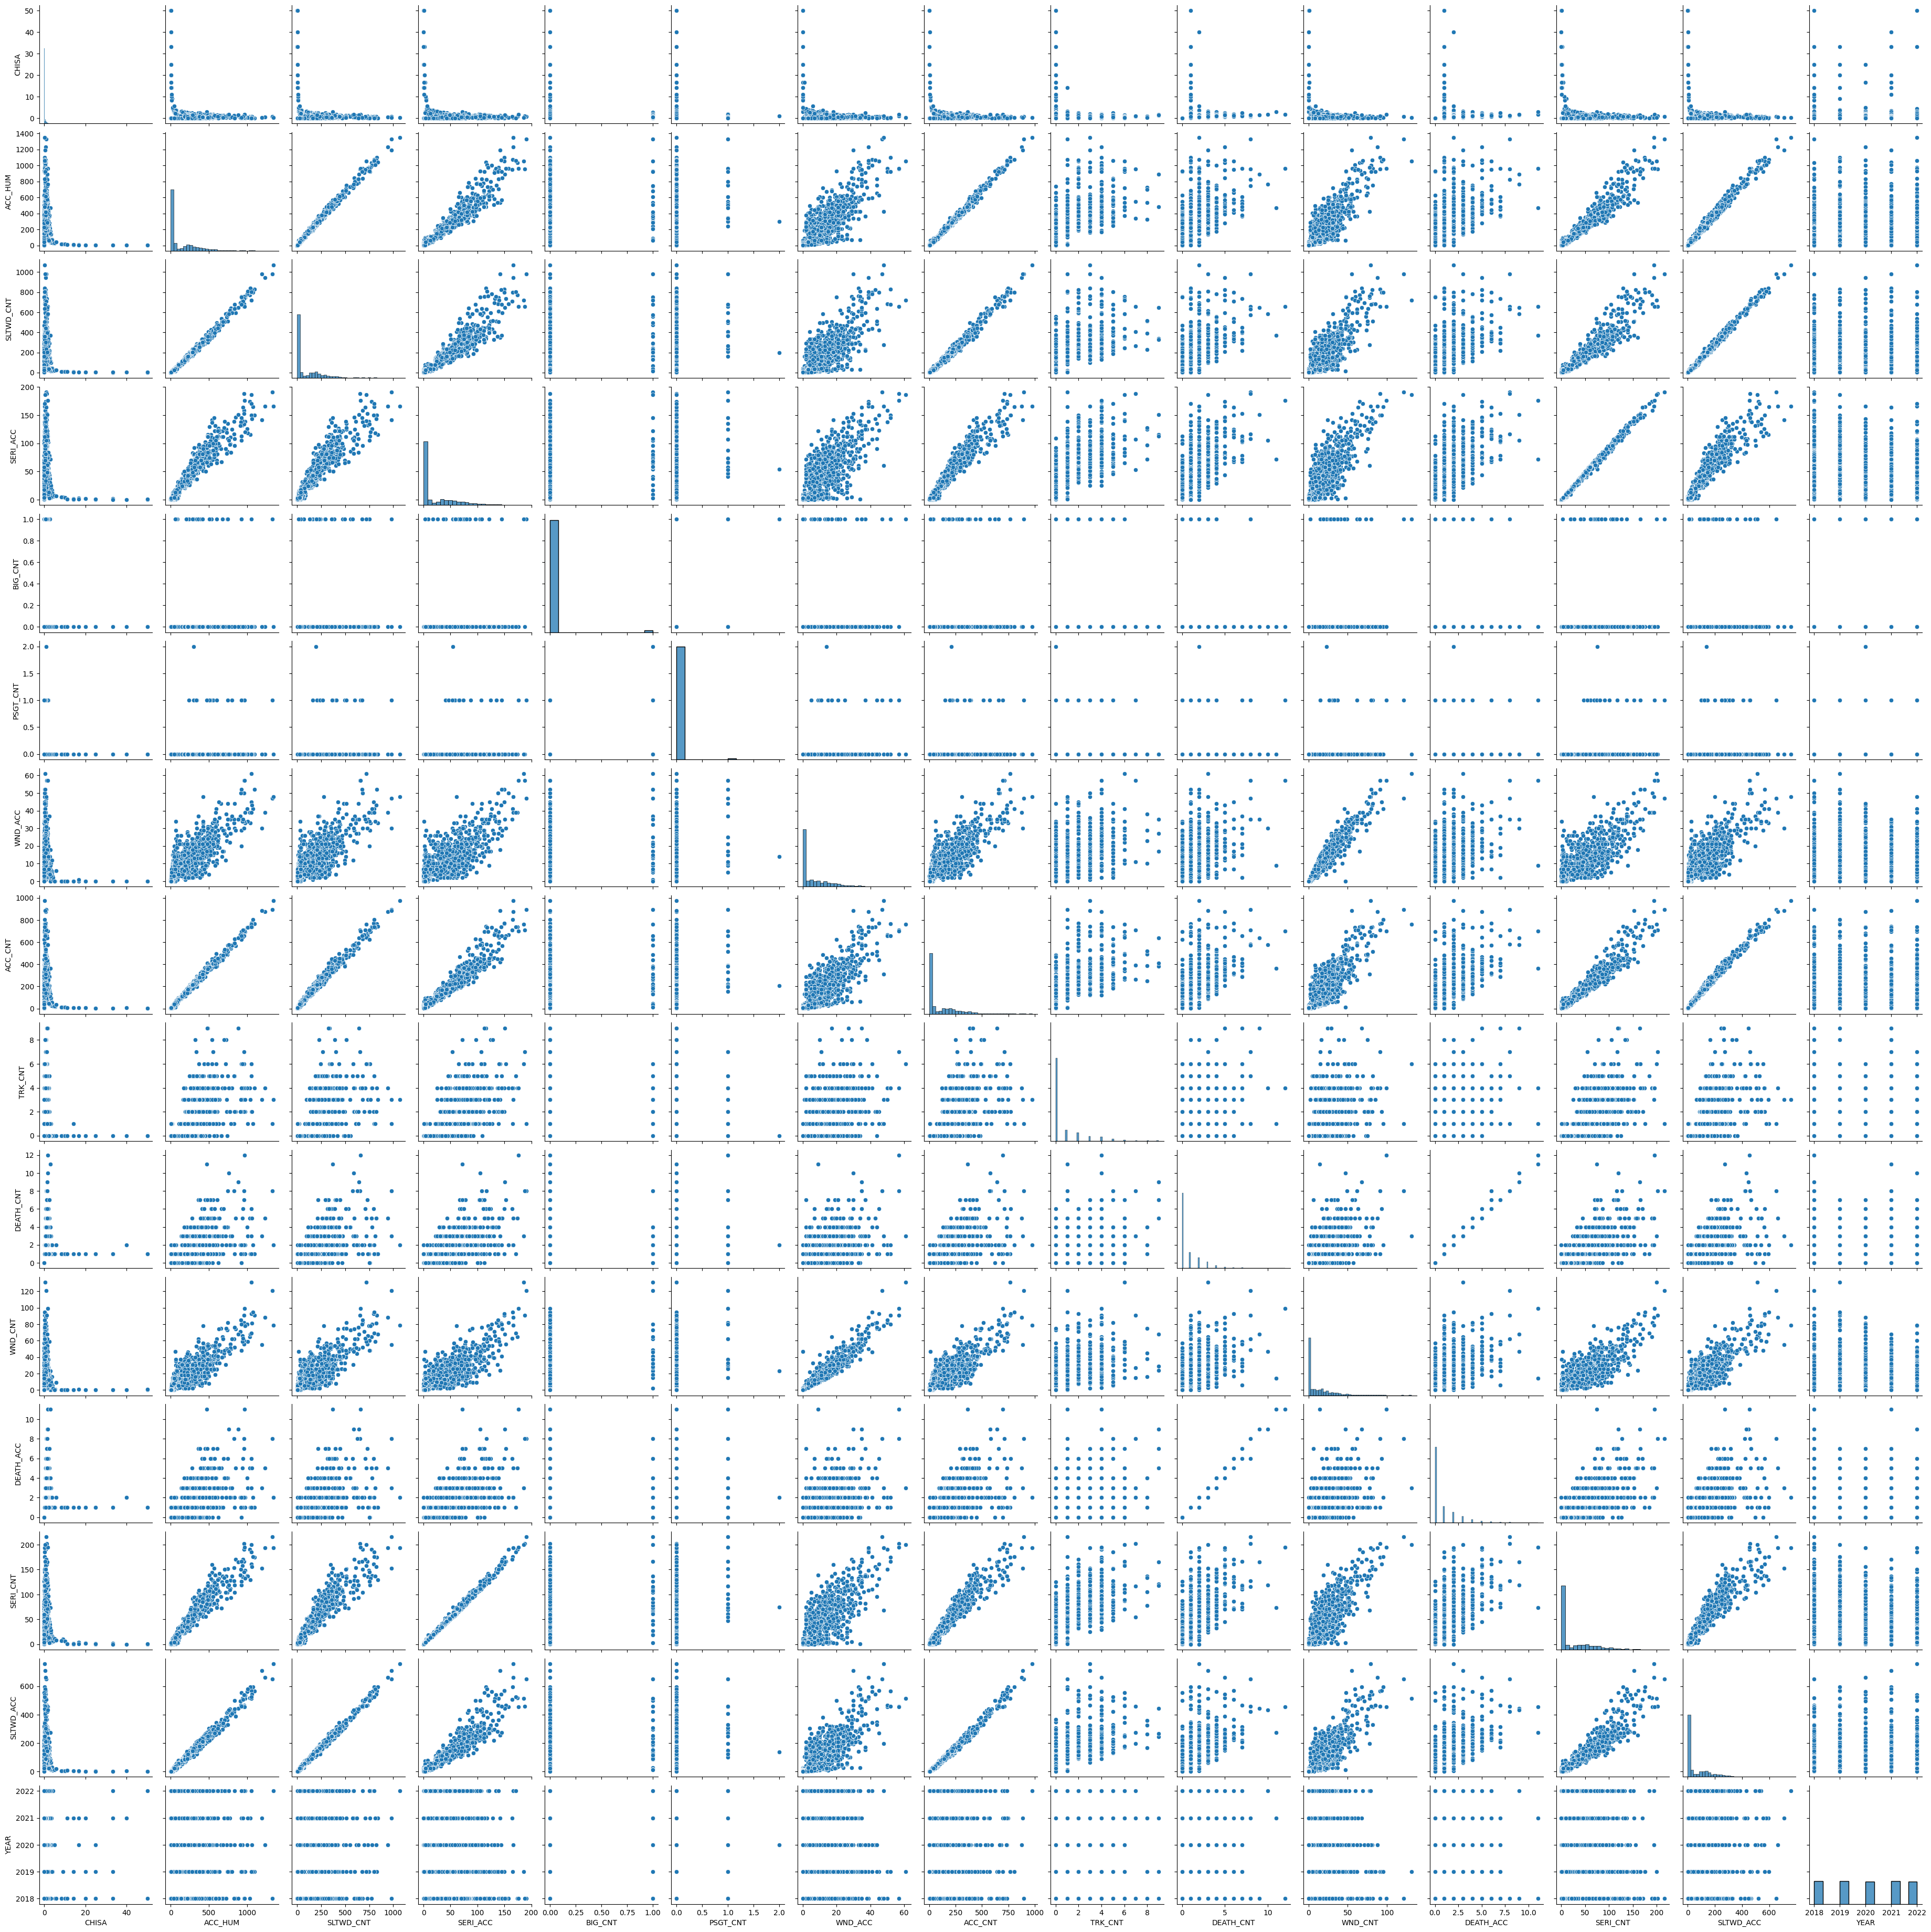

In [57]:
sns.pairplot(time_age)